#1) Data Preparation

##Import Library

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# import dataset property
sheet_url = 'https://docs.google.com/spreadsheets/d/1SdiKMJnTFUQMu0niJ9F5j6o69JemstxleLRpX674ag0/edit#gid=1269266327'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
df_nyc = pd.read_csv(sheet_url_trf)
df_nyc.head()

https://docs.google.com/spreadsheets/d/1SdiKMJnTFUQMu0niJ9F5j6o69JemstxleLRpX674ag0/export?format=csv&gid=1269266327


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 0:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 0:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 0:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 0:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 0:00:00


In [ ]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

#2)Data Cleaning

In [ ]:
#Make a copy of the original data for data cleaning
df_nyc_dc = df_nyc.copy()

In [ ]:
df_nyc_dc.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

Insight:
* TAX CLASS AT PRESENT
* EASE-MENT
* BUILDING CLASS AT PRESENT
* APARTMENT NUMBER

Above list are the columns with null values

In [ ]:
#Change SALE DATE data type to datetime
df_nyc_dc['SALE DATE'] = pd.to_datetime(df_nyc_dc['SALE DATE'])
df_nyc_dc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17


In [ ]:
#Change SALE PRICE, LAND SQUARE FEET and GROSS SQUARE FEET data type to int

df_nyc_dc['LAND SQUARE FEET'] = [int(size) if size.isdigit() else -1 for size in df_nyc_dc['LAND SQUARE FEET']]
df_nyc_dc['GROSS SQUARE FEET'] = [int(size) if size.isdigit() else -1 for size in df_nyc_dc['GROSS SQUARE FEET']]
df_nyc_dc['SALE PRICE'] = [int(price) if price.isdigit() else -1 for price in df_nyc_dc['SALE PRICE']]
df_nyc_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      84548 non-null  int64         
 1   BOROUGH                         84548 non-null  int64         
 2   NEIGHBORHOOD                    84548 non-null  object        
 3   BUILDING CLASS CATEGORY         84548 non-null  object        
 4   TAX CLASS AT PRESENT            83810 non-null  object        
 5   BLOCK                           84548 non-null  int64         
 6   LOT                             84548 non-null  int64         
 7   EASE-MENT                       0 non-null      float64       
 8   BUILDING CLASS AT PRESENT       83810 non-null  object        
 9   ADDRESS                         84548 non-null  object        
 10  APARTMENT NUMBER                19052 non-null  object        
 11  ZI

In [ ]:
#Change BOROUGH data type to str and change the code name
df_nyc_dc['BOROUGH'] = df_nyc_dc['BOROUGH'].astype(str)
df_nyc_dc['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
df_nyc_dc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-1,2016-12-14
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-1,2016-12-09
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17


##Check data values and typos

In [ ]:
df_nyc_dc.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [ ]:
#Drop the unnecessary columns
df_nyc_dc.drop(columns = ['Unnamed: 0','TAX CLASS AT PRESENT','EASE-MENT','BUILDING CLASS AT PRESENT','APARTMENT NUMBER','BUILDING CLASS AT TIME OF SALE','ZIP CODE'], inplace=True)


In [ ]:
df_nyc_dc.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BLOCK', 'LOT',
       'ADDRESS', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [ ]:
#Checking values from all columns
for i in df_nyc_dc.columns:
  unique_data = df_nyc_dc[i].value_counts()
  print(unique_data, '\n')

Queens           26736
Brooklyn         24047
Manhattan        18306
Staten Island     8410
Bronx             7049
Name: BOROUGH, dtype: int64 

FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
FRESH KILLS                    2
BRONX PARK                     1
PELHAM BAY                     1
EAST RIVER                     1
CITY ISLAND-PELHAM STRIP       1
Name: NEIGHBORHOOD, Length: 254, dtype: int64 

01 ONE FAMILY DWELLINGS                       18235
02 TWO FAMILY DWELLINGS                       15828
13 CONDOS - ELEVATOR APARTMENTS               12989
10 COOPS - ELEVATOR APARTMENTS                12902
03 THREE FAMILY DWELLINGS                      4384
07 RENTALS - WALKUP APARTMENTS                 3466
09 COOPS - WALKUP APARTMENTS                   2767
04 TAX CLASS 1 CONDOS                          1656
44 CONDO PARKING            

##Missing value Treatment

In [ ]:
df_nyc_dc.shape

(84548, 15)

In [ ]:
df_nyc_dc.isnull().sum()

BOROUGH                      0
NEIGHBORHOOD                 0
BUILDING CLASS CATEGORY      0
BLOCK                        0
LOT                          0
ADDRESS                      0
RESIDENTIAL UNITS            0
COMMERCIAL UNITS             0
TOTAL UNITS                  0
LAND SQUARE FEET             0
GROSS SQUARE FEET            0
YEAR BUILT                   0
TAX CLASS AT TIME OF SALE    0
SALE PRICE                   0
SALE DATE                    0
dtype: int64

There are no more column with null value

In [ ]:
df_nyc_dc[df_nyc_dc.columns[0]].value_counts()

Queens           26736
Brooklyn         24047
Manhattan        18306
Staten Island     8410
Bronx             7049
Name: BOROUGH, dtype: int64

* Queens (4)
* Brooklyn (3)
* Manhattan (1)
* Staten Island (5)
* Bronx (2)

In [ ]:
df_nyc_dc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,6,153 AVENUE B,5,0,5,1633,6440,1900,2,6625000,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,399,26,234 EAST 4TH STREET,28,3,31,4616,18690,1900,2,-1,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,399,39,197 EAST 3RD STREET,16,1,17,2212,7803,1900,2,-1,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,402,21,154 EAST 7TH STREET,10,0,10,2272,6794,1913,2,3936272,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,404,55,301 EAST 10TH STREET,6,0,6,2369,4615,1900,2,8000000,2016-11-17


In [ ]:
df_nyc_dc.sort_values('SALE DATE',ascending=True)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
71272,Queens,ROCKAWAY PARK,44 CONDO PARKING,16226,1177,136 BEACH 117 STREET,0,0,1,-1,-1,0,4,-1,2016-09-01
53425,Queens,CORONA,01 ONE FAMILY DWELLINGS,1724,26,33-30 110 STREET,1,0,1,2000,1824,1901,1,446160,2016-09-01
5932,Manhattan,HARLEM-EAST,15 CONDOS - 2-10 UNIT RESIDENTIAL,1710,1208,450 EAST 117 STREET,1,0,1,-1,-1,2005,2,789000,2016-09-01
5933,Manhattan,HARLEM-EAST,15 CONDOS - 2-10 UNIT RESIDENTIAL,1710,1208,450 E 117 ST,1,0,1,-1,-1,2005,2,-1,2016-09-01
5935,Manhattan,HARLEM-EAST,16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,1710,1211,450 EAST 117 STREET,0,1,1,-1,-1,2005,2,-1,2016-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10443,Manhattan,MURRAY HILL,15 CONDOS - 2-10 UNIT RESIDENTIAL,892,1206,113 EAST 36TH STREET,1,0,1,-1,-1,1910,2,655000,2017-08-31
43538,Brooklyn,OCEAN PARKWAY-NORTH,10 COOPS - ELEVATOR APARTMENTS,5357,17,"280 OCEAN PKWY, 3C",0,0,0,0,0,1941,2,749000,2017-08-31
57978,Queens,FLUSHING-NORTH,13 CONDOS - ELEVATOR APARTMENTS,4978,1454,39TH AVENUE,1,0,1,-1,-1,2014,2,711512,2017-08-31
39096,Brooklyn,FLATBUSH-NORTH,15 CONDOS - 2-10 UNIT RESIDENTIAL,1332,1003,504 LEFFERTS AVENUE,1,0,1,0,0,2003,2,995000,2017-08-31


2016-09-01 to 2017-08-31

##Ambigous Value

In [ ]:
specific_rows = df_nyc_dc.loc[df_nyc_dc['SALE PRICE'] == -1]
specific_rows

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,399,26,234 EAST 4TH STREET,28,3,31,4616,18690,1900,2,-1,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,399,39,197 EAST 3RD STREET,16,1,17,2212,7803,1900,2,-1,2016-12-09
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,405,16,516 EAST 12TH STREET,20,0,20,2581,9730,1900,2,-1,2017-07-20
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,407,18,520 EAST 14TH STREET,44,2,46,5163,21007,1900,2,-1,2017-07-20
8,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,379,34,141 AVENUE D,15,0,15,1534,9198,1920,2,-1,2017-06-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84524,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,7091,28,51 CLAY PIT ROAD,2,0,2,2986,1820,1999,1,-1,2017-07-06
84525,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,7091,188,1576 WOODROW ROAD,2,0,2,2490,1530,1998,1,-1,2016-10-14
84538,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,7316,61,178 DARNELL LANE,2,0,2,3215,1300,1995,1,-1,2017-06-30
84539,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,7316,85,137 DARNELL LANE,2,0,2,3016,1300,1995,1,-1,2016-12-30


There are 14,496 out of 83,810 rows with SALE PRICE = -1
Because -1 value is not relevant

In [ ]:
#Drop the sale price = -1 (because not relevant)
df_nyc_dc = df_nyc_dc[df_nyc_dc['SALE PRICE'] != -1]

In [ ]:
df_nyc_dc.loc[df_nyc_dc['SALE PRICE'] == -1]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [ ]:
specific_rows1 = df_nyc_dc.loc[df_nyc_dc['SALE PRICE'] == 0]
specific_rows1

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18311,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,3048,27,538 EAST 182 STREET,1,0,1,1209,1048,1901,1,0,2016-09-20
18313,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,3053,105,2323 BASSFORD AVENUE,1,0,1,922,1248,1901,1,0,2017-03-16
18314,Bronx,BATHGATE,02 TWO FAMILY DWELLINGS,2912,151,519 EAST 171 STREET,2,0,2,2000,2400,1993,1,0,2016-10-24
18315,Bronx,BATHGATE,02 TWO FAMILY DWELLINGS,2929,128,559 CLAREMONT PARKWAY,2,0,2,2361,2394,1995,1,0,2017-05-04
18320,Bronx,BATHGATE,02 TWO FAMILY DWELLINGS,3035,130,462 EAST 179 STREET,2,0,2,1790,2340,1998,1,0,2016-12-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49391,Brooklyn,WYCKOFF HEIGHTS,27 FACTORIES,3248,12,1562 DEKALB AVENUE,0,1,1,10000,10000,1931,4,0,2017-07-19
49396,Brooklyn,WYCKOFF HEIGHTS,31 COMMERCIAL VACANT LAND,3189,137,267 STARR STREET,0,0,0,2500,0,0,4,0,2017-05-04
49398,Brooklyn,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,3189,2,33 WYCKOFF AVENUE,0,0,0,2415,0,0,4,0,2017-05-04
49399,Brooklyn,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,3189,3,33A WYCKOFF AVENUE,0,0,0,2390,0,0,4,0,2017-05-04


10,148 rows with SALE PRICE = 0

In [ ]:
specific_rows2 = df_nyc_dc.loc[df_nyc_dc['YEAR BUILT'] == 0]
specific_rows2

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
74,Manhattan,ALPHABET CITY,11A CONDO-RENTALS,394,1602,183-189 AVENUE B,0,0,0,-1,-1,0,2,8058923,2017-08-09
76,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,386,1002,211 EAST 3RD STREET,1,0,1,-1,-1,0,2,620000,2016-12-30
87,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,375,1004,754 EAST 6TH STREET,1,0,1,-1,-1,0,2,875000,2017-03-31
117,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,390,1009,217 EAST 7TH STREET,1,0,1,-1,-1,0,2,550000,2017-06-23
118,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,390,1014,217 EAST 7TH STREET,1,0,1,-1,-1,0,2,1085000,2017-03-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84162,Staten Island,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1478,194,VEDDER AVENUE,0,0,0,223,-1,0,1,2000,2017-04-06
84163,Staten Island,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1478,541,WILLOWBROOK ROAD,0,0,0,3971,-1,0,1,90000,2017-03-15
84166,Staten Island,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1508,140,19 CANTERBURY AVENUE,0,0,0,5000,-1,0,1,400000,2017-04-27
84167,Staten Island,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1524,22,CAMBRIDGE AVENUE,0,0,0,4000,-1,0,1,300000,2017-05-05


6235 rows where YEAR BUILT = 0

In [ ]:
specific_rows4 = df_nyc_dc.loc[df_nyc_dc['LAND SQUARE FEET'] == -1]
specific_rows4

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,"327 EAST 3 STREET, 1C",0,0,0,-1,-1,1920,2,1,2016-09-06
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,"327 EAST 3 STREET, 1C",0,0,0,-1,-1,1920,2,499000,2017-03-10
14,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,"327 EAST 3 STREET, 3A",0,0,0,-1,-1,1920,2,10,2017-04-28
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,"327 EAST 3RD STREET, 5A",0,0,0,-1,-1,1920,2,529500,2017-06-09
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,"327 EAST 3 STREET, 2E",0,0,0,-1,-1,1920,2,423000,2017-07-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84383,Staten Island,WILLOWBROOK,04 TAX CLASS 1 CONDOS,2086,1009,39 DREYER AVENUE,1,0,1,-1,-1,1979,1,415500,2016-10-31
84384,Staten Island,WILLOWBROOK,04 TAX CLASS 1 CONDOS,2087,1002,392 HAWTHORNE AVENUE,1,0,1,-1,-1,1980,1,335000,2016-10-20
84385,Staten Island,WILLOWBROOK,04 TAX CLASS 1 CONDOS,2087,1021,418 HAWTHORNE AVENUE,1,0,1,-1,-1,1980,1,420000,2016-12-29
84388,Staten Island,WILLOWBROOK,04 TAX CLASS 1 CONDOS,2089,1006,18 DARCEY AVENUE,1,0,1,-1,-1,1980,1,407000,2016-10-13


25,866  rows where LAND SQUARE FEET = -1

In [ ]:
specific_rows5 = df_nyc_dc.loc[df_nyc_dc['LAND SQUARE FEET'] == 0]
specific_rows5

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,3035,48,"463 EAST 178TH STREET, 6E",0,0,0,0,0,1935,2,40000,2017-04-17
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,3035,48,"463 EAST 178TH ST, 6B",0,0,0,0,0,1935,2,40000,2017-04-17
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,3044,40,"495 E 178TH STREET, 2H",0,0,0,0,0,1941,2,60000,2016-12-01
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,4795,1009,2877 ELY AVENUE,1,0,1,0,0,2008,1,310000,2017-02-28
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,4795,1027,2853 ELY AVENUE,1,0,1,0,0,2008,1,342500,2017-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49377,Brooklyn,WYCKOFF HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,3238,1025,101 WYCKOFF AVENUE,1,0,1,0,0,0,2,527000,2017-03-27
49378,Brooklyn,WYCKOFF HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,3248,1013,1610 DEKALB AVENUE,1,0,1,0,0,0,2,910000,2017-05-03
49379,Brooklyn,WYCKOFF HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,3248,1015,1610 DEKALB AVENUE,1,0,1,0,0,0,2,934000,2017-06-19
49380,Brooklyn,WYCKOFF HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,3328,1015,358 GROVE ST,1,0,1,0,0,0,2,499998,2017-02-22


9,974 ROWS WHERE LAND SQUARE FEET = 0

In [ ]:
specific_rows6 = df_nyc_dc.loc[df_nyc_dc['GROSS SQUARE FEET'] == -1]
specific_rows6

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,"327 EAST 3 STREET, 1C",0,0,0,-1,-1,1920,2,1,2016-09-06
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,"327 EAST 3 STREET, 1C",0,0,0,-1,-1,1920,2,499000,2017-03-10
14,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,"327 EAST 3 STREET, 3A",0,0,0,-1,-1,1920,2,10,2017-04-28
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,"327 EAST 3RD STREET, 5A",0,0,0,-1,-1,1920,2,529500,2017-06-09
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,"327 EAST 3 STREET, 2E",0,0,0,-1,-1,1920,2,423000,2017-07-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84384,Staten Island,WILLOWBROOK,04 TAX CLASS 1 CONDOS,2087,1002,392 HAWTHORNE AVENUE,1,0,1,-1,-1,1980,1,335000,2016-10-20
84385,Staten Island,WILLOWBROOK,04 TAX CLASS 1 CONDOS,2087,1021,418 HAWTHORNE AVENUE,1,0,1,-1,-1,1980,1,420000,2016-12-29
84388,Staten Island,WILLOWBROOK,04 TAX CLASS 1 CONDOS,2089,1006,18 DARCEY AVENUE,1,0,1,-1,-1,1980,1,407000,2016-10-13
84389,Staten Island,WILLOWBROOK,05 TAX CLASS 1 VACANT LAND,730,65,81 KELL AVENUE,0,0,0,2000,-1,0,1,20000,2017-01-04


27,226 ROWS WHERE GROSS SQUARE FEET = -1

In [ ]:
specific_rows7 = df_nyc_dc.loc[df_nyc_dc['GROSS SQUARE FEET'] == 0]
specific_rows7

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,3035,48,"463 EAST 178TH STREET, 6E",0,0,0,0,0,1935,2,40000,2017-04-17
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,3035,48,"463 EAST 178TH ST, 6B",0,0,0,0,0,1935,2,40000,2017-04-17
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,3044,40,"495 E 178TH STREET, 2H",0,0,0,0,0,1941,2,60000,2016-12-01
18364,Bronx,BATHGATE,29 COMMERCIAL GARAGES,2918,29,1885 BATHGATE AVENUE,0,0,0,3070,0,0,4,2500000,2016-12-15
18371,Bronx,BATHGATE,31 COMMERCIAL VACANT LAND,3028,13,1996 WEBSTER AVENUE,0,0,0,5945,0,0,4,1200000,2016-10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49397,Brooklyn,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,3189,1,35 WYCKOFF AVENUE,0,0,0,2431,0,0,4,5650000,2017-05-04
49398,Brooklyn,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,3189,2,33 WYCKOFF AVENUE,0,0,0,2415,0,0,4,0,2017-05-04
49399,Brooklyn,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,3189,3,33A WYCKOFF AVENUE,0,0,0,2390,0,0,4,0,2017-05-04
49400,Brooklyn,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,3280,50,383 HARMAN STREET,0,0,0,2765,0,0,4,2825000,2017-03-28


11,065 ROWS WHERE GROSS SQUARE FEET = 0

##Check Duplicates

In [ ]:
df_nyc_dc.duplicated()

0        False
3        False
4        False
6        False
9        False
         ...  
84543    False
84544    False
84545    False
84546    False
84547    False
Length: 69987, dtype: bool

No duplicates

##Cleaned data

In [ ]:
df_nyc_cleaned = df_nyc_dc.copy()

In [ ]:
df_nyc_cleaned.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,6,153 AVENUE B,5,0,5,1633,6440,1900,2,6625000,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,402,21,154 EAST 7TH STREET,10,0,10,2272,6794,1913,2,3936272,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,404,55,301 EAST 10TH STREET,6,0,6,2369,4615,1900,2,8000000,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,406,32,210 AVENUE B,8,0,8,1750,4226,1920,2,3192840,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,387,153,629 EAST 5TH STREET,24,0,24,4489,18523,1920,2,16232000,2016-11-07


##Removing sale price = 0

Sale price = 0 means transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement

In [ ]:
#Data with sale price = 0
df_nyc_cleaned

#Remove the sale price = 0
df_nyc_cleaned1 = df_nyc_cleaned.copy()

In [ ]:
df_nyc_cleaned.shape

(69987, 15)

In [ ]:
df_nyc_cleaned1 = df_nyc_cleaned1[df_nyc_cleaned1['SALE PRICE'] != 0]
df_nyc_cleaned1


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,6,153 AVENUE B,5,0,5,1633,6440,1900,2,6625000,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,402,21,154 EAST 7TH STREET,10,0,10,2272,6794,1913,2,3936272,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,404,55,301 EAST 10TH STREET,6,0,6,2369,4615,1900,2,8000000,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,406,32,210 AVENUE B,8,0,8,1750,4226,1920,2,3192840,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,387,153,629 EAST 5TH STREET,24,0,24,4489,18523,1920,2,16232000,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,7349,34,37 QUAIL LANE,2,0,2,2400,2575,1998,1,450000,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,7349,78,32 PHEASANT LANE,2,0,2,2498,2377,1998,1,550000,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,7351,60,49 PITNEY AVENUE,2,0,2,4000,1496,1925,1,460000,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,7100,28,2730 ARTHUR KILL ROAD,0,7,7,208033,64117,2001,4,11693337,2016-12-21


In [ ]:
df_nyc_cleaned1.shape

(59759, 15)

##Check outliers

In [ ]:
df_outlier = df_nyc_cleaned1.copy()

In [ ]:
df_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59759 entries, 0 to 84547
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    59759 non-null  object        
 1   NEIGHBORHOOD               59759 non-null  object        
 2   BUILDING CLASS CATEGORY    59759 non-null  object        
 3   BLOCK                      59759 non-null  int64         
 4   LOT                        59759 non-null  int64         
 5   ADDRESS                    59759 non-null  object        
 6   RESIDENTIAL UNITS          59759 non-null  int64         
 7   COMMERCIAL UNITS           59759 non-null  int64         
 8   TOTAL UNITS                59759 non-null  int64         
 9   LAND SQUARE FEET           59759 non-null  int64         
 10  GROSS SQUARE FEET          59759 non-null  int64         
 11  YEAR BUILT                 59759 non-null  int64         
 12  TAX 

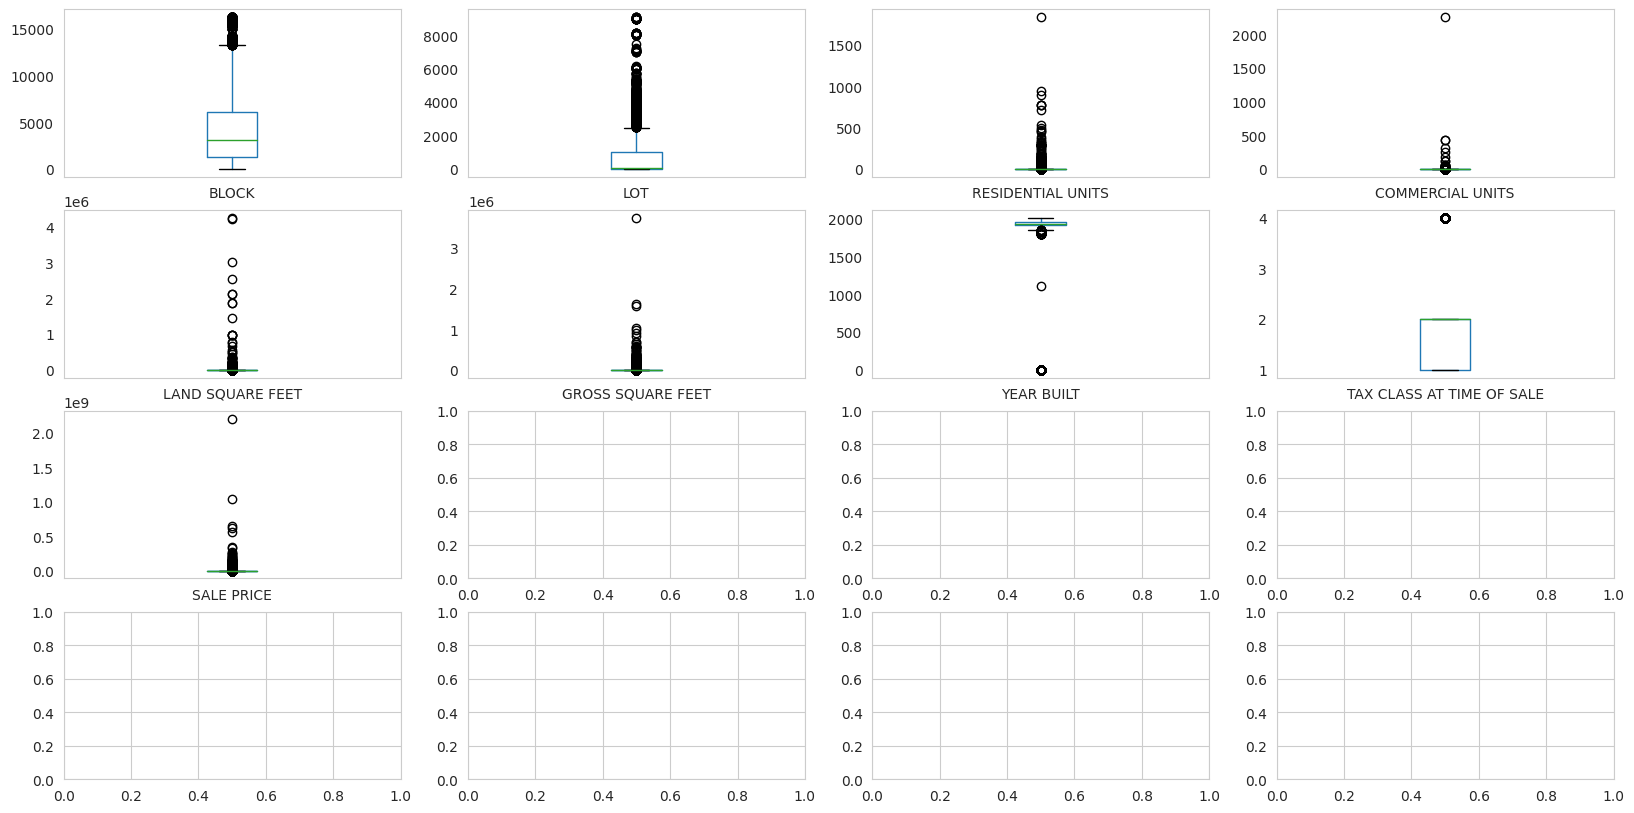

In [ ]:
#Check all the numeric data types columns data distribution
col_numeric = ['BLOCK','LOT','RESIDENTIAL UNITS','COMMERCIAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','TAX CLASS AT TIME OF SALE','SALE PRICE']
fig, ax = plt.subplots(nrows = 4, ncols= 4, figsize =(20,10))
for i, el in enumerate(col_numeric):
  plot_checks = df_outlier.boxplot(el, ax = ax.flatten()[i],grid=False)
plt.show()

In [ ]:
# Check the Quantile (Q1,Q3), IQR, Min & Max
print('Outlier Detection "SALE PRICE":')
sale_Q1 = df_outlier['SALE PRICE'].quantile(0.25)
sale_Q3 = df_outlier['SALE PRICE'].quantile(0.75)
sale_IQR = sale_Q3 - sale_Q1
sale_LOWER = sale_Q1-1.5*sale_IQR
sale_HIGHER = sale_Q3+1.5*sale_IQR

print("Q1 = {:,.2f}".format(sale_Q1))
print("Q3 = {:,.2f}".format(sale_Q3))
print("IQR = {:,.2f}".format(sale_IQR))
print("Lower = {:,.2f}".format(sale_LOWER))
print("Higher = {:,.2f}".format(sale_HIGHER))
print('\n')

Outlier Detection "SALE PRICE":
Q1 = 370,000.00
Q3 = 1,070,000.00
IQR = 700,000.00
Lower = -680,000.00
Higher = 2,120,000.00




In [ ]:
#Total row before removing outlier
df_outlier.shape

(59759, 15)

In [ ]:
#Removing/Excluding the outlier and assign it on new variable "df_clean"
df_cleaned_outlier = df_outlier[~((df_outlier["SALE PRICE"] < sale_LOWER) | (df_outlier["SALE PRICE"] > sale_HIGHER))]
df_cleaned_outlier.shape

(53392, 15)

<Axes: xlabel='SALE PRICE'>

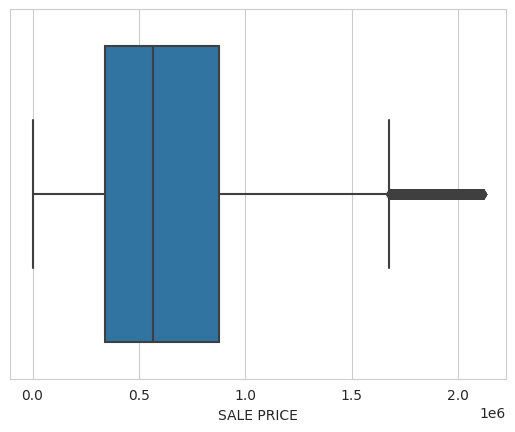

In [ ]:
#Cheking the data distribution of the df_outlier data for total_buy_transaction_amount
sns.boxplot(data = df_cleaned_outlier , x ="SALE PRICE")

In [ ]:
df_cleaned_outlier['SALE PRICE'].value_counts()

10         766
450000     427
550000     416
650000     414
600000     409
          ... 
1837500      1
777500       1
1778000      1
357225       1
69300        1
Name: SALE PRICE, Length: 7371, dtype: int64

##Drop value <60000 because the cheapest property in NYC is 60000

In [ ]:
df_cleaned_outlier1 = df_cleaned_outlier.drop(df_cleaned_outlier[df_cleaned_outlier['SALE PRICE'] < 60000].index, inplace=True)


<ipython-input-148-37720c6e0fdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_outlier1 = df_cleaned_outlier.drop(df_cleaned_outlier[df_cleaned_outlier['SALE PRICE'] < 60000].index, inplace=True)


In [ ]:
df_cleaned_outlier['SALE PRICE'].value_counts()

450000     427
550000     416
650000     414
600000     409
700000     382
          ... 
960107       1
1038513      1
578438       1
639500       1
69300        1
Name: SALE PRICE, Length: 7069, dtype: int64

#3)EDA

In [ ]:
df_eda = df_cleaned_outlier.copy()

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51319 entries, 13 to 84547
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    51319 non-null  object        
 1   NEIGHBORHOOD               51319 non-null  object        
 2   BUILDING CLASS CATEGORY    51319 non-null  object        
 3   BLOCK                      51319 non-null  int64         
 4   LOT                        51319 non-null  int64         
 5   ADDRESS                    51319 non-null  object        
 6   RESIDENTIAL UNITS          51319 non-null  int64         
 7   COMMERCIAL UNITS           51319 non-null  int64         
 8   TOTAL UNITS                51319 non-null  int64         
 9   LAND SQUARE FEET           51319 non-null  int64         
 10  GROSS SQUARE FEET          51319 non-null  int64         
 11  YEAR BUILT                 51319 non-null  int64         
 12  TAX

##Borough Distribution

In [ ]:
df_eda['BOROUGH'].value_counts()

Queens           17481
Brooklyn         13483
Manhattan         9979
Staten Island     5749
Bronx             4627
Name: BOROUGH, dtype: int64

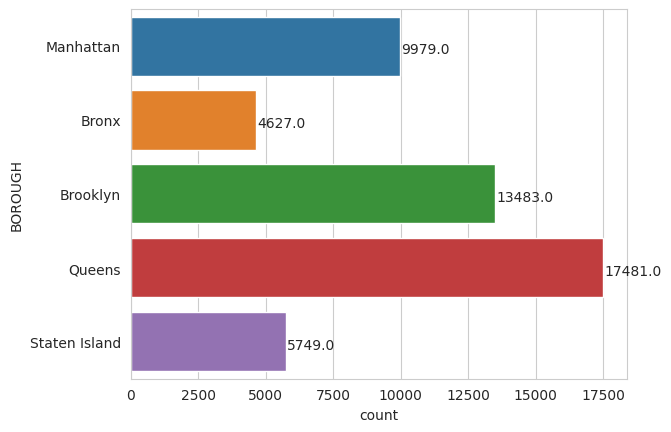

In [ ]:
# plot the countplot
ax = sns.countplot(y="BOROUGH", data=df_eda)

# add count labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() + 50, p.get_y() + 0.5))

plt.show()

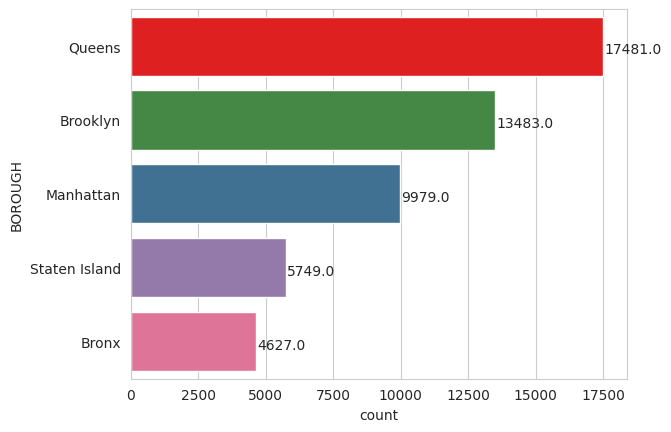

In [ ]:
# plot the countplot
colors = ["#FF0000", "#3A923A", "#3274A1", "#9372B2", "#F06292"]
ax = sns.countplot(y="BOROUGH", data=df_eda, order=df_eda['BOROUGH'].value_counts().index, palette=colors)

# add count labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() + 50, p.get_y() + 0.5))

plt.show()

##Building Class Category Distribution

In [ ]:
df_eda['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                       12331
10 COOPS - ELEVATOR APARTMENTS                10638
02 TWO FAMILY DWELLINGS                        9396
13 CONDOS - ELEVATOR APARTMENTS                7664
09 COOPS - WALKUP APARTMENTS                   2400
03 THREE FAMILY DWELLINGS                      2150
04 TAX CLASS 1 CONDOS                          1210
07 RENTALS - WALKUP APARTMENTS                 1033
17 CONDO COOPS                                 1019
15 CONDOS - 2-10 UNIT RESIDENTIAL               873
12 CONDOS - WALKUP APARTMENTS                   648
05 TAX CLASS 1 VACANT LAND                      409
22 STORE BUILDINGS                              271
14 RENTALS - 4-10 UNIT                          207
29 COMMERCIAL GARAGES                           173
43 CONDO OFFICE BUILDINGS                       152
44 CONDO PARKING                                115
31 COMMERCIAL VACANT LAND                       108
21 OFFICE BUILDINGS                             101
30 WAREHOUSE

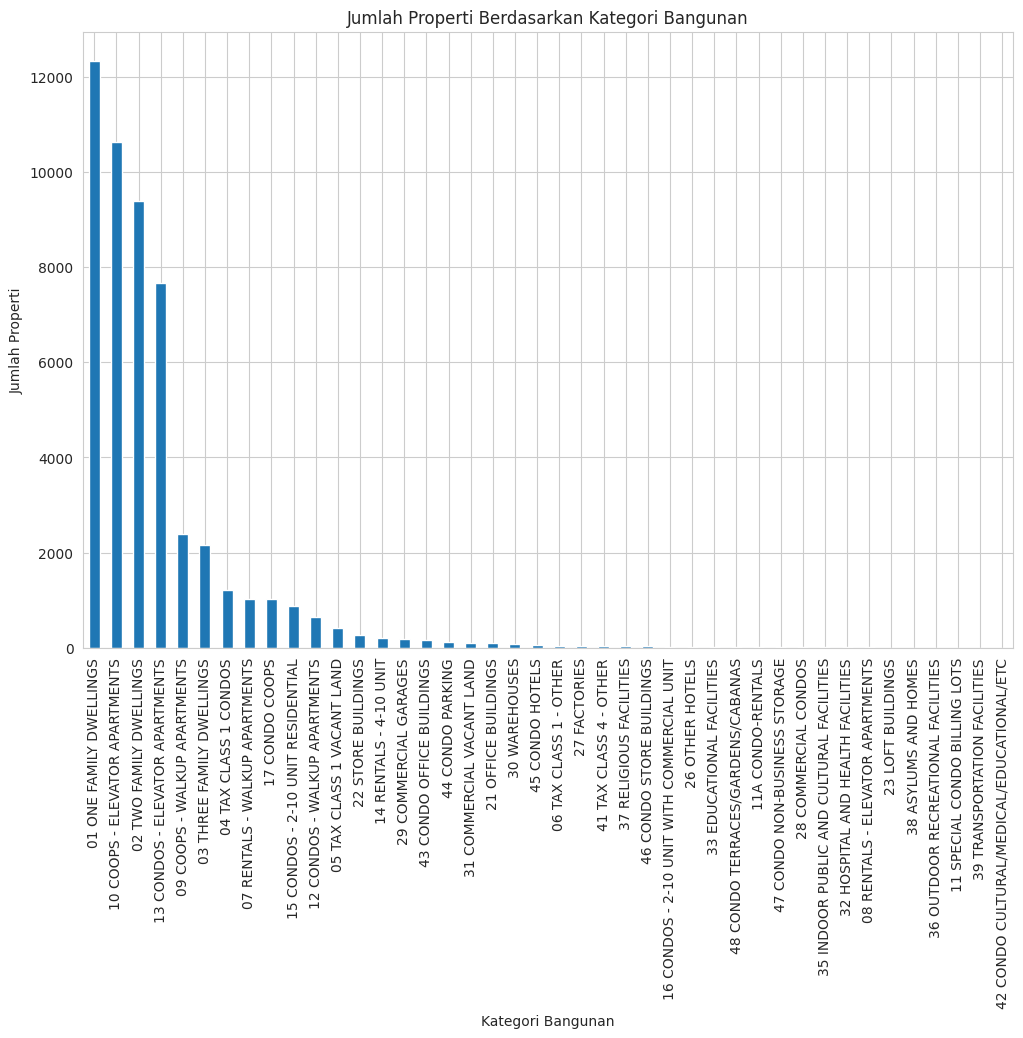

In [ ]:
plt.figure(figsize=(12,8))
df_eda['BUILDING CLASS CATEGORY'].value_counts().plot(kind='bar')
plt.title('Jumlah Properti Berdasarkan Kategori Bangunan')
plt.xlabel('Kategori Bangunan')
plt.ylabel('Jumlah Properti')
plt.show()

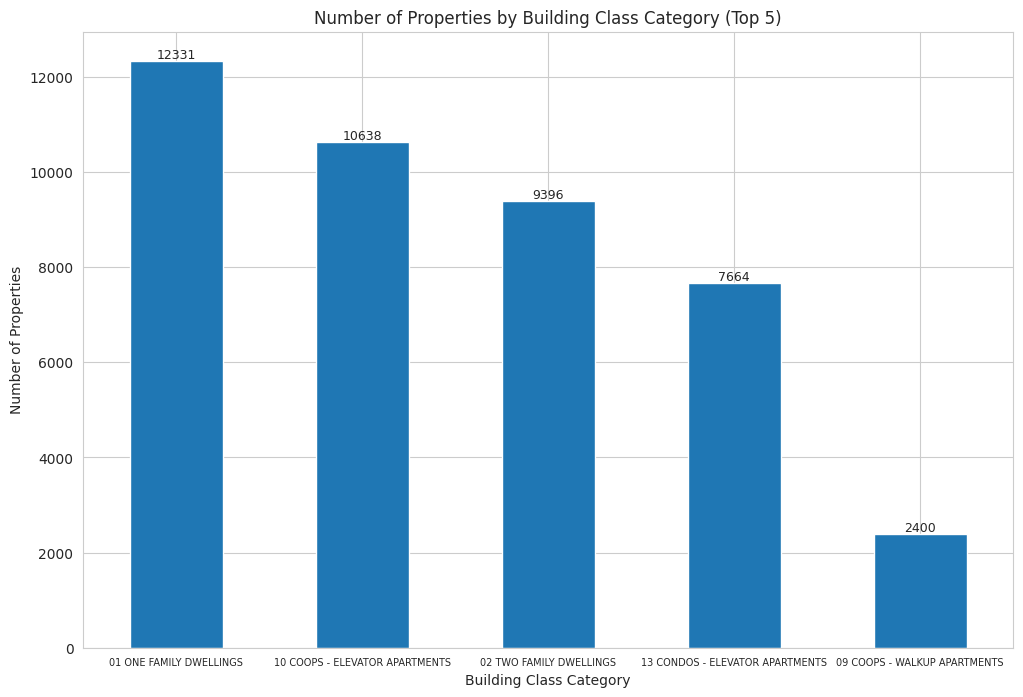

In [ ]:
plt.figure(figsize=(12,8))
ax = df_eda['BUILDING CLASS CATEGORY'].value_counts().nlargest(5).plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
plt.title('Number of Properties by Building Class Category (Top 5)')
plt.xlabel('Building Class Category')
plt.xticks(rotation=0, fontsize=7)
plt.ylabel('Number of Properties')

# Add labels on each bar
for i, v in enumerate(df_eda['BUILDING CLASS CATEGORY'].value_counts().nlargest(5)):
    ax.text(i, v+50, str(v), ha='center', fontsize=9)

plt.show()


##Sale Price Distribution

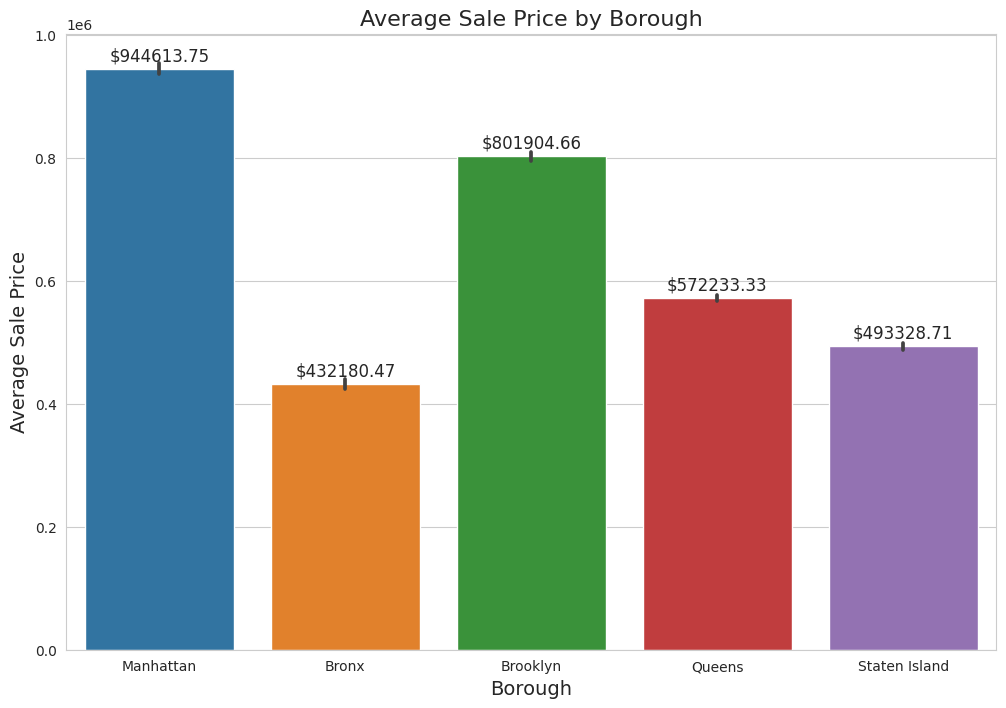

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

ax = sns.barplot(x="BOROUGH", y="SALE PRICE", data=df_eda, estimator=np.mean)

plt.title("Average Sale Price by Borough", fontsize=16)
plt.xlabel("Borough", fontsize=14)
plt.ylabel("Average Sale Price", fontsize=14)

# Adding labels to each bar
for i, bar in enumerate(ax.containers[0]):
    height = bar.get_height()
    ax.annotate("${:.2f}".format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom',
                fontsize=12)

plt.show()


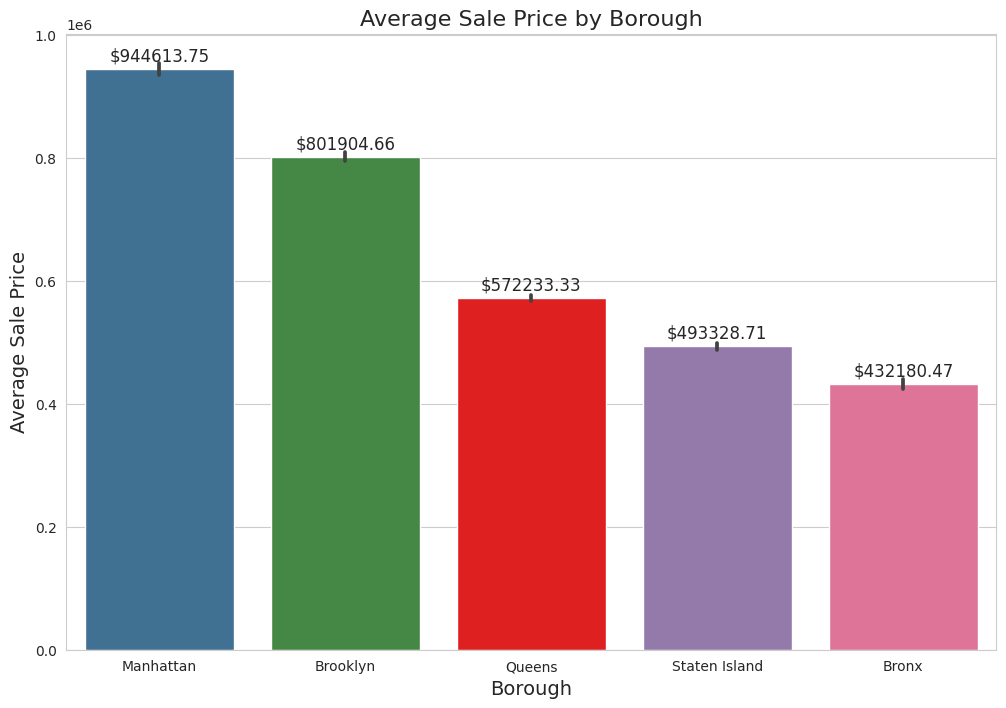

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

colors = ["#3274A1", "#3A923A", "#FF0000", "#9372B2", "#F06292"]
mean_sale_price = df_eda.groupby('BOROUGH')['SALE PRICE'].mean().sort_values(ascending=False)

ax = sns.barplot(x="BOROUGH", y="SALE PRICE", data=df_eda, estimator=np.mean, order=mean_sale_price.index, palette=colors)

plt.title("Average Sale Price by Borough", fontsize=16)
plt.xlabel("Borough", fontsize=14)
plt.ylabel("Average Sale Price", fontsize=14)

# Adding labels to each bar
for i, bar in enumerate(ax.containers[0]):
    height = bar.get_height()
    ax.annotate("${:.2f}".format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom',
                fontsize=12)

plt.show()

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

ax = sns.barplot(x="BOROUGH", y="SALE PRICE", data=df_eda, estimator=np.mean)

plt.title("Average Sale Price by Borough", fontsize=16)
plt.xlabel("Borough", fontsize=14)
plt.ylabel("Average Sale Price", fontsize=14)

# Adding labels to each bar
for i, bar in enumerate(ax.containers[0]):
    height = bar.get_height()
    ax.annotate("${:.2f}".format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom',
                fontsize=12)

plt.show()

In [ ]:
df_eda.groupby('BOROUGH').agg({'BOROUGH': 'count', 'SALE PRICE': ['sum','mean', 'min', 'max']})

BOROUGH   SALE PRICE                           
                count          sum       mean    min      max
BOROUGH                                                      
Bronx            4627   1999699042 432180.472  60000  2100000
Brooklyn        13483  10812080576 801904.663  60000  2120000
Manhattan        9979   9426300562 944613.745  60000  2120000
Queens          17481  10003210768 572233.326  60000  2100000
Staten Island    5749   2836146747 493328.709  60000  1960000

##Descriptive Statistics

###Descriptive information about numeric variable

In [ ]:
df_eda.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BLOCK', 'LOT',
       'ADDRESS', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51319 entries, 13 to 84547
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    51319 non-null  object        
 1   NEIGHBORHOOD               51319 non-null  object        
 2   BUILDING CLASS CATEGORY    51319 non-null  object        
 3   BLOCK                      51319 non-null  int64         
 4   LOT                        51319 non-null  int64         
 5   ADDRESS                    51319 non-null  object        
 6   RESIDENTIAL UNITS          51319 non-null  int64         
 7   COMMERCIAL UNITS           51319 non-null  int64         
 8   TOTAL UNITS                51319 non-null  int64         
 9   LAND SQUARE FEET           51319 non-null  int64         
 10  GROSS SQUARE FEET          51319 non-null  int64         
 11  YEAR BUILT                 51319 non-null  int64         
 12  TAX

In [ ]:
#Descriptive analysis after treating the outlier
pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric = [
    'RESIDENTIAL UNITS',
    'COMMERCIAL UNITS',
    'TOTAL UNITS',
    'LAND SQUARE FEET',
    'GROSS SQUARE FEET',
    'YEAR BUILT',
    'TAX CLASS AT TIME OF SALE',
    'SALE PRICE']

desc_eda = df_eda[numeric].describe()
desc_eda.loc['kurtosis'] = df_eda[numeric].kurt()
desc_eda.loc['variance'] = df_eda[numeric].var()
desc_eda

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,51319.000,51319.000,51319.000,51319.000,51319.000,51319.000,51319.000,51319.000
mean,1.206,0.090,1.302,1861.800,1291.259,1824.630,1.552,683517.561
std,9.575,10.003,13.912,22538.821,18063.967,481.087,0.629,429218.583
min,0.000,0.000,0.000,-1.000,-1.000,0.000,1.000,60000.000
25%,0.000,0.000,0.000,-1.000,-1.000,1920.000,1.000,370000.000
50%,1.000,0.000,1.000,1295.000,525.000,1945.000,2.000,585000.000
75%,2.000,0.000,2.000,2500.000,1782.000,1965.000,2.000,890000.000
max,1844.000,2261.000,2261.000,4228300.000,3750565.000,2017.000,4.000,2120000.000
kurtosis,27066.809,50849.634,19929.921,25276.440,36255.786,10.403,3.092,0.812
variance,91.685,100.070,193.538,507998445.837,326306901.098,231445.033,0.396,184228592394.274


* Average total residential units (1.206) is higher than commercial units (0.090)
* Average **sale price** : **683,517.561**
* Highest **sale price** : **2,120,000.000**
* The Lowest **sale price** : **60,000**
* The newest **Year Built** : **2017**


###Descriptive information about string variable

In [ ]:
temp = []
for i in range(len(df_eda.columns)):
    if (df_eda[df_eda.columns[i]].dtypes not in ('datetime64[ns]','float64', 'int64')):
        temp.append(i)
df_eda.columns[temp].tolist()

['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'ADDRESS']

In [ ]:
desc_str = ['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'ADDRESS']
df_eda[desc_str].describe()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS
count,51319,51319,51319,51319
unique,5,252,42,44122
top,Queens,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,131-05 40TH ROAD
freq,17481,2041,12331,209


Insight:
* Top Borough : **Queens**
* Top Neighborhood : **Flushing-North**
* Top Building Class Category : **01 One Family Dwellings**
* Top Address : **131-05 40TH ROAD**

###Descriptive information about date type variable

In [ ]:
df_eda['SALE DATE'].describe()

<ipython-input-164-621dc7e8200b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_eda['SALE DATE'].describe()


count                   51319
unique                    330
top       2017-06-29 00:00:00
freq                      340
first     2016-09-01 00:00:00
last      2017-08-31 00:00:00
Name: SALE DATE, dtype: object


The transaction date start from **2016-09-01** to **2017-08-31**

Total sales transaction **51,319**

Top transaction happened at **2017-06-29** with **340** transactions

#4)Segmentation

In [ ]:
#Make a copy of the clean data for segmentation
df_segmentation = df_eda.copy()
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51319 entries, 13 to 84547
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    51319 non-null  object        
 1   NEIGHBORHOOD               51319 non-null  object        
 2   BUILDING CLASS CATEGORY    51319 non-null  object        
 3   BLOCK                      51319 non-null  int64         
 4   LOT                        51319 non-null  int64         
 5   ADDRESS                    51319 non-null  object        
 6   RESIDENTIAL UNITS          51319 non-null  int64         
 7   COMMERCIAL UNITS           51319 non-null  int64         
 8   TOTAL UNITS                51319 non-null  int64         
 9   LAND SQUARE FEET           51319 non-null  int64         
 10  GROSS SQUARE FEET          51319 non-null  int64         
 11  YEAR BUILT                 51319 non-null  int64         
 12  TAX

Create cluster using these feature:
* Borough
* Sale Price  

##Libraries

In [ ]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis

##Check Data Distribution

In [ ]:
df_distribution = df_segmentation[['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY','SALE PRICE','SALE DATE']]
df_distribution


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,SALE PRICE,SALE DATE
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,499000,2017-03-10
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,529500,2017-06-09
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,423000,2017-07-14
17,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,501000,2017-03-16
18,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,450000,2016-09-01
...,...,...,...,...,...
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,648000,2016-12-07
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,450000,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,550000,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,460000,2017-07-05


##Number of sales transaction per month for each borough

In [ ]:
df_salespermonth = df_distribution.copy()

# assuming 'SALE DATE' column is not in datetime format
df_salespermonth['SALE DATE'] = pd.to_datetime(df_salespermonth['SALE DATE'])

# set 'SALE DATE' as the index
df_salespermonth = df_salespermonth.set_index('SALE DATE')

# groupby 'BOROUGH' and resample by month
df_monthly = df_salespermonth.groupby('BOROUGH')['SALE PRICE'].resample('M').count()

print(df_monthly)

BOROUGH        SALE DATE 
Bronx          2016-09-30     421
               2016-10-31     378
               2016-11-30     371
               2016-12-31     421
               2017-01-31     333
               2017-02-28     358
               2017-03-31     422
               2017-04-30     390
               2017-05-31     404
               2017-06-30     466
               2017-07-31     354
               2017-08-31     309
Brooklyn       2016-09-30    1263
               2016-10-31     956
               2016-11-30    1060
               2016-12-31    1234
               2017-01-31    1086
               2017-02-28     976
               2017-03-31    1242
               2017-04-30     974
               2017-05-31    1168
               2017-06-30    1401
               2017-07-31    1081
               2017-08-31    1042
Manhattan      2016-09-30     910
               2016-10-31     757
               2016-11-30     732
               2016-12-31     822
               2017-01

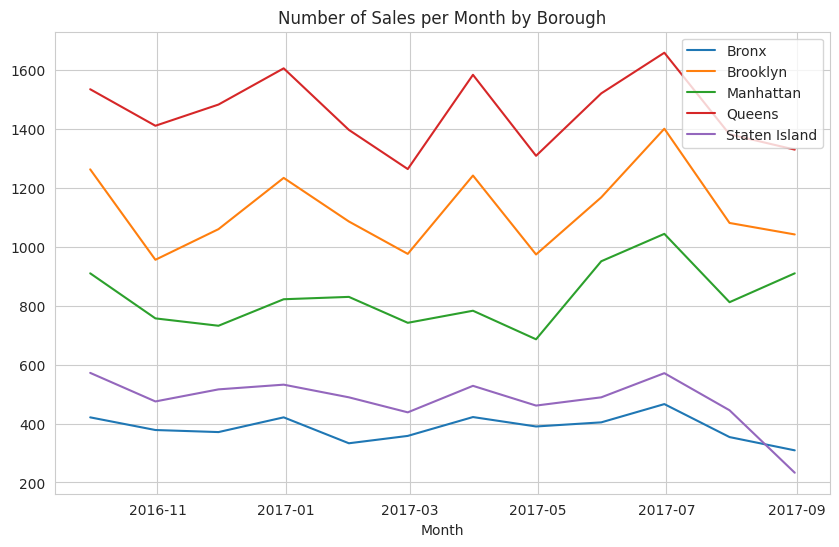

In [ ]:
# create a figure and axis objects
fig, ax = plt.subplots(figsize=(10,6))

# iterate over each borough and plot a line for each
for borough in df_monthly.index.levels[0]:
    ax.plot(df_monthly.loc[borough], label=borough)

# set the x-axis label and title
ax.set_xlabel('Month')
ax.set_title('Number of Sales per Month by Borough')

# add a legend
ax.legend()

# display the plot
plt.show()


##Staten Island Criteria

In [ ]:
df_staten = df_distribution[df_distribution['BOROUGH'] == 'Staten Island'].copy()
df_staten

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,SALE PRICE,SALE DATE
76139,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,437500,2017-05-30
76141,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,579000,2016-11-21
76143,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,370000,2016-10-14
76144,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,439000,2017-06-29
76145,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,300000,2017-06-30
...,...,...,...,...,...
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,648000,2016-12-07
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,450000,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,550000,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,460000,2017-07-05


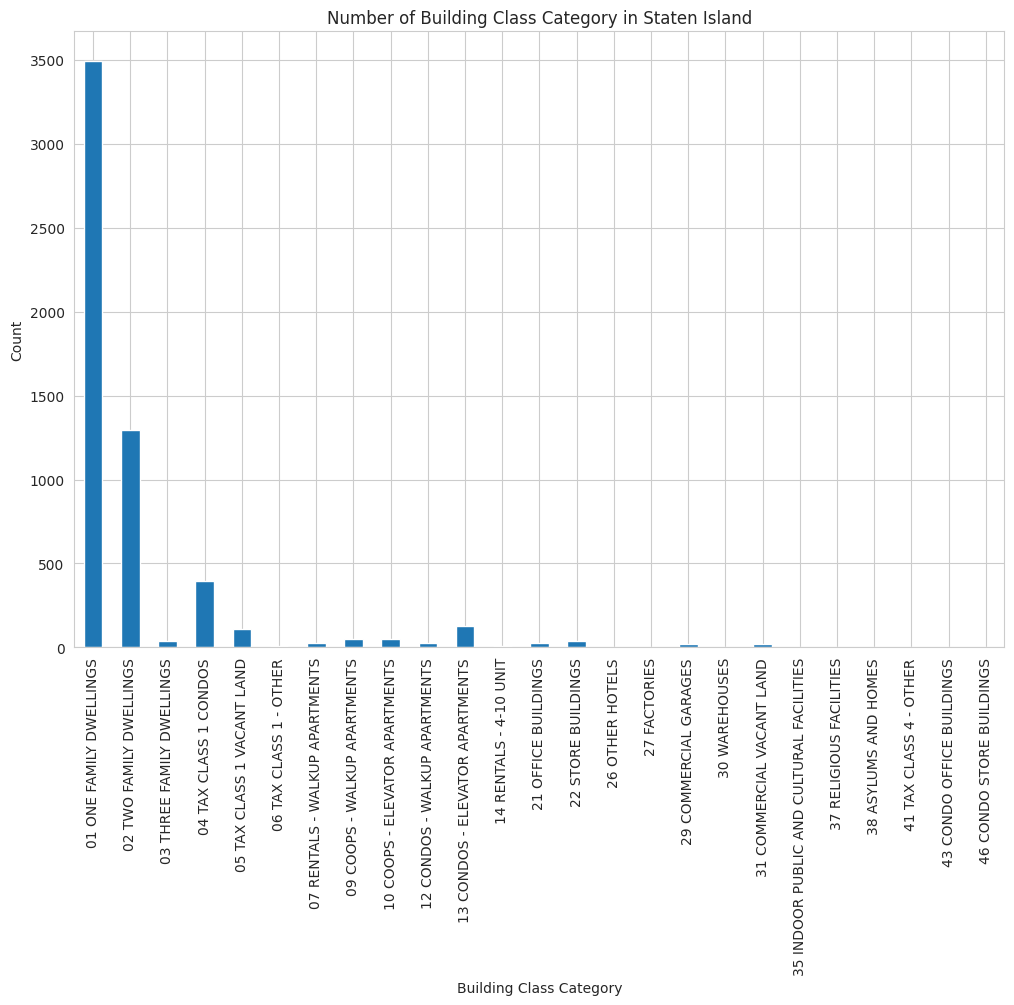

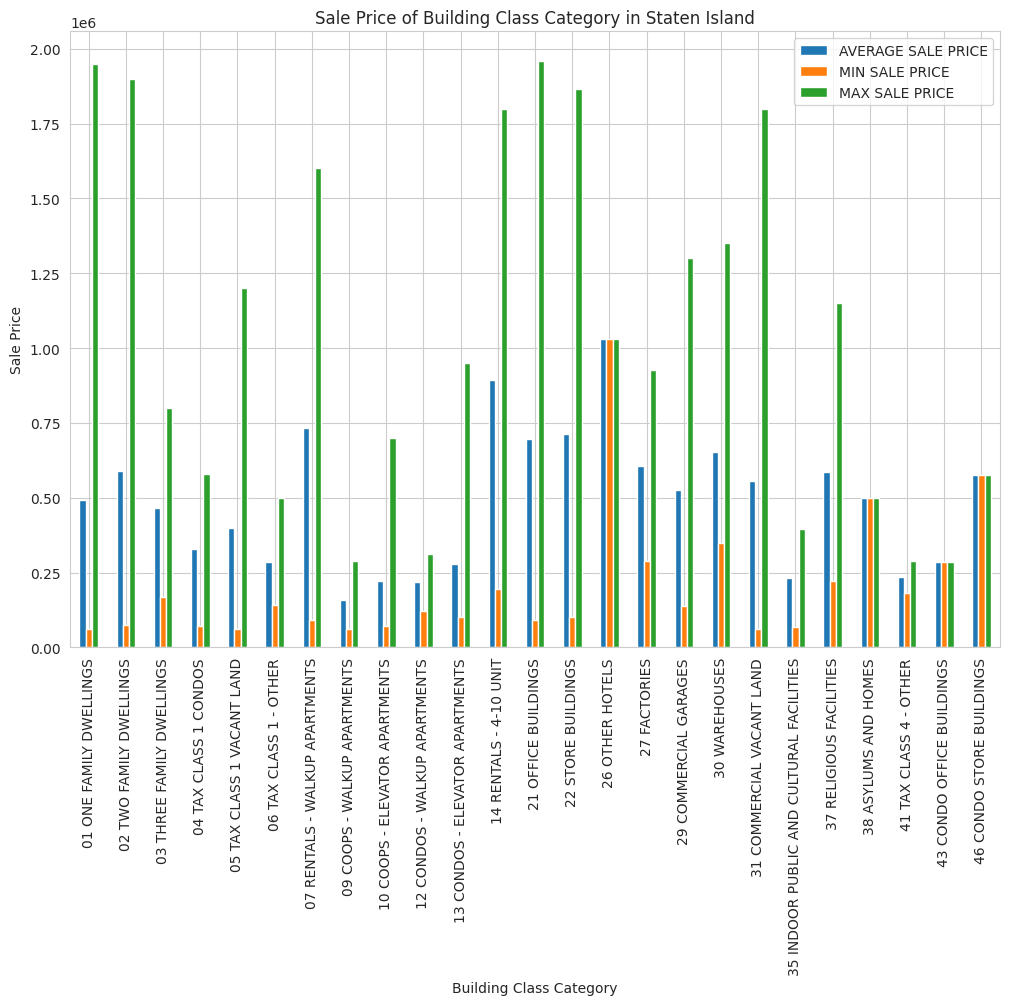

In [ ]:
df_staten_grouped = df_staten.groupby('BUILDING CLASS CATEGORY').agg({'BUILDING CLASS CATEGORY': 'count', 'SALE PRICE': ['mean', 'min', 'max']})
df_staten_grouped.columns = ['COUNT', 'AVERAGE SALE PRICE', 'MIN SALE PRICE', 'MAX SALE PRICE']

ax = df_staten_grouped['COUNT'].plot(kind='bar', figsize=(12,8))
ax.set_title('Number of Building Class Category in Staten Island')
ax.set_xlabel('Building Class Category')
ax.set_ylabel('Count')
plt.show()

ax = df_staten_grouped[['AVERAGE SALE PRICE', 'MIN SALE PRICE', 'MAX SALE PRICE']].plot(kind='bar', figsize=(12,8))
ax.set_title('Sale Price of Building Class Category in Staten Island')
ax.set_xlabel('Building Class Category')
ax.set_ylabel('Sale Price')
plt.show()


In [ ]:
top5_type_staten = df_staten.groupby(["BUILDING CLASS CATEGORY"]).agg({'SALE PRICE': ['count', 'min', 'max', 'mean']})
top5_type_staten = top5_type_staten.sort_values(by=('SALE PRICE', 'count'), ascending=False).head(5)
print(top5_type_staten)


                                SALE PRICE                            
                                     count     min      max       mean
BUILDING CLASS CATEGORY                                               
01 ONE FAMILY DWELLINGS               3496   62000  1950000 491844.920
02 TWO FAMILY DWELLINGS               1297   75000  1900000 589457.901
04 TAX CLASS 1 CONDOS                  393   72500   580000 328154.372
13 CONDOS - ELEVATOR APARTMENTS        126  100000   950000 279559.944
05 TAX CLASS 1 VACANT LAND             109   60000  1200000 400032.982


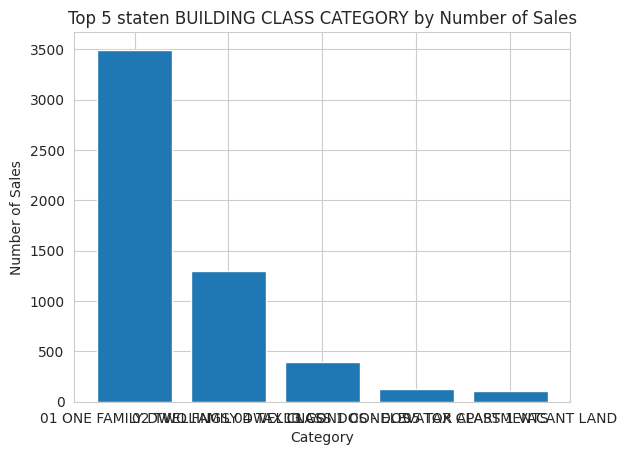

In [ ]:
top5_sales_staten = top5_type_staten[('SALE PRICE', 'count')]
top5_bclasscat_staten = top5_sales_staten.index

plt.bar(top5_bclasscat_staten, top5_sales_staten)
plt.title('Top 5 staten BUILDING CLASS CATEGORY by Number of Sales')
plt.xlabel('Category')
plt.ylabel('Number of Sales')

plt.show()


In [ ]:
top5_type_staten1 = df_staten.groupby(["NEIGHBORHOOD"]).agg({'SALE PRICE': ['count', 'min', 'max', 'mean']})
top5_type_staten1 = top5_type_staten1.sort_values(by=('SALE PRICE', 'count'), ascending=False).head(5)
print(top5_type_staten1)
#------------------------------------------
average_sale_price = df_staten['SALE PRICE'].mean()
highest_sale_price = df_staten['SALE PRICE'].max()
lowest_sale_price = df_staten['SALE PRICE'].min()
# print the highest and lowest sale prices
print('Average sale price: ${:,.2f}'.format(average_sale_price))
print('Highest sale price: ${:,.2f}'.format(highest_sale_price))

                SALE PRICE                            
                     count     min      max       mean
NEIGHBORHOOD                                          
GREAT KILLS            536   60000  1865000 489716.614
NEW SPRINGVILLE        332  100000  1900000 451290.105
BULLS HEAD             297  100000  1800000 454610.956
ELTINGVILLE            243  168333  1185000 531438.568
ARDEN HEIGHTS          239  157170   852000 401392.297
Average sale price: $493,328.71
Highest sale price: $1,960,000.00


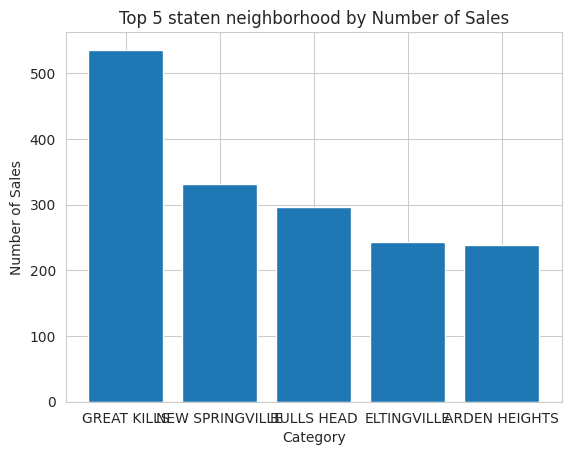

In [ ]:
top5_sales_staten1 = top5_type_staten1[('SALE PRICE', 'count')]
top5_neighborhood_staten1 = top5_sales_staten1.index

plt.bar(top5_neighborhood_staten1, top5_sales_staten1)
plt.title('Top 5 staten neighborhood by Number of Sales')
plt.xlabel('Category')
plt.ylabel('Number of Sales')

plt.show()


##Bronx Criteria

In [ ]:
df_bronx = df_distribution[df_distribution['BOROUGH'] == 'Bronx'].copy()
df_bronx

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,SALE PRICE,SALE DATE
18306,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,140000,2017-05-12
18307,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,420000,2017-02-03
18308,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,127000,2017-08-22
18309,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,273796,2016-09-21
18310,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,231244,2016-09-21
...,...,...,...,...,...
25349,Bronx,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,110000,2017-01-04
25350,Bronx,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,205000,2017-03-01
25351,Bronx,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,117000,2017-08-01
25352,Bronx,WOODLAWN,22 STORE BUILDINGS,1085250,2017-04-17


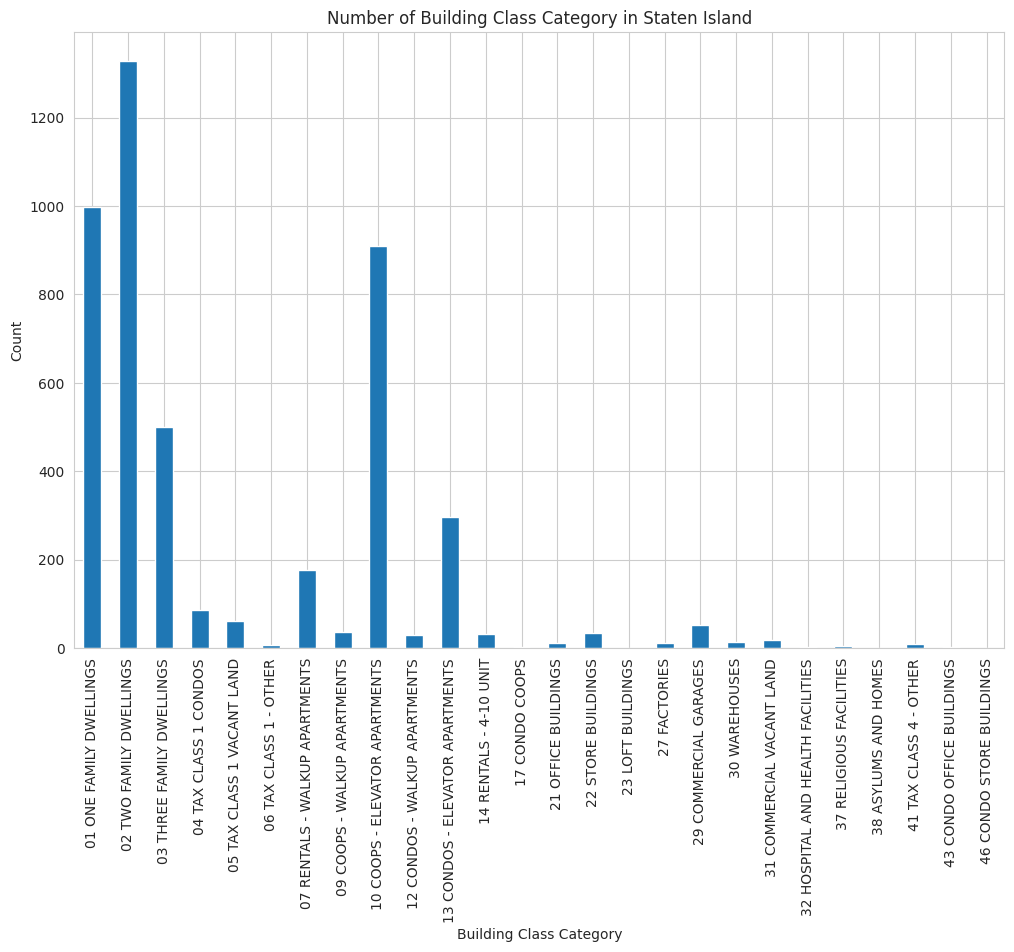

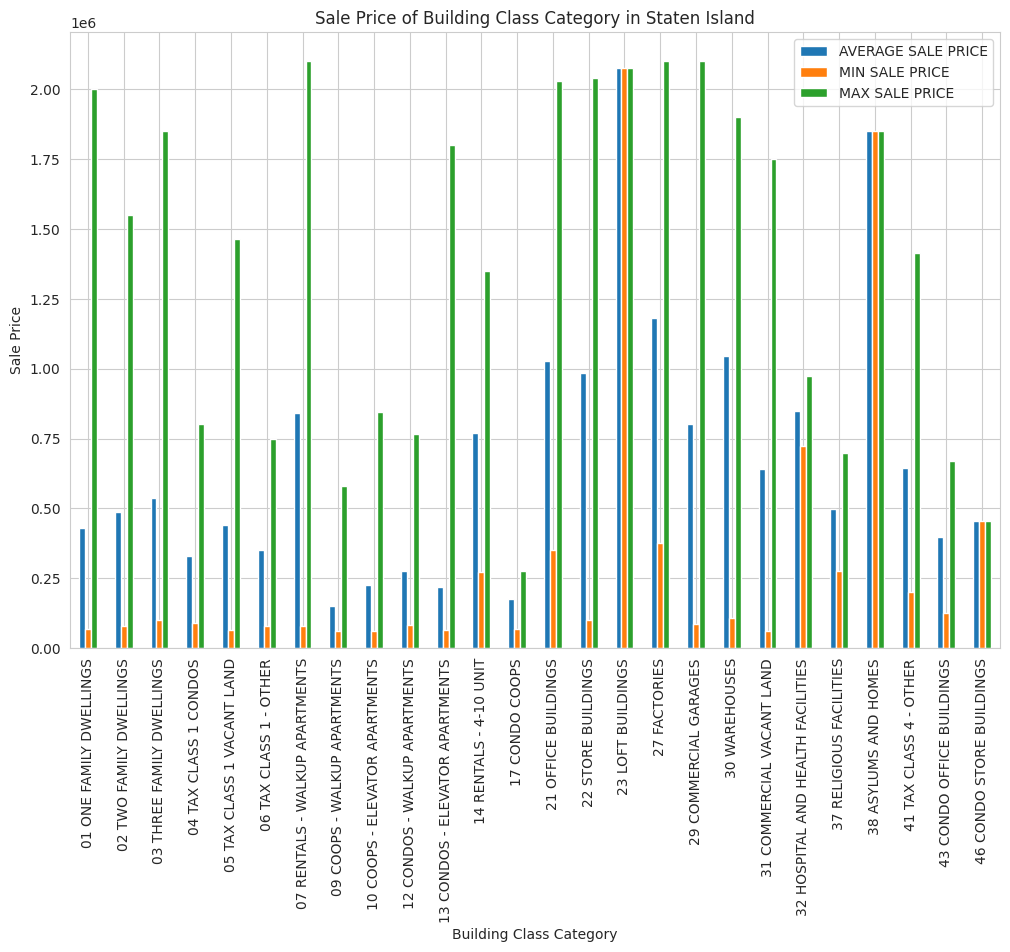

In [ ]:
df_bronx_grouped = df_bronx.groupby('BUILDING CLASS CATEGORY').agg({'BUILDING CLASS CATEGORY': 'count', 'SALE PRICE': ['mean', 'min', 'max']})
df_bronx_grouped.columns = ['COUNT', 'AVERAGE SALE PRICE', 'MIN SALE PRICE', 'MAX SALE PRICE']

ax = df_bronx_grouped['COUNT'].plot(kind='bar', figsize=(12,8))
ax.set_title('Number of Building Class Category in Staten Island')
ax.set_xlabel('Building Class Category')
ax.set_ylabel('Count')
plt.show()

ax = df_bronx_grouped[['AVERAGE SALE PRICE', 'MIN SALE PRICE', 'MAX SALE PRICE']].plot(kind='bar', figsize=(12,8))
ax.set_title('Sale Price of Building Class Category in Staten Island')
ax.set_xlabel('Building Class Category')
ax.set_ylabel('Sale Price')
plt.show()


In [ ]:
df_bronx_grouped

,COUNT,AVERAGE SALE PRICE,MIN SALE PRICE,MAX SALE PRICE
BUILDING CLASS CATEGORY,,,,
01 ONE FAMILY DWELLINGS,998,430629.189,68571,2000000
02 TWO FAMILY DWELLINGS,1327,485437.062,80000,1550000
03 THREE FAMILY DWELLINGS,500,536650.556,100000,1850000
04 TAX CLASS 1 CONDOS,87,329498.356,89882,802381
05 TAX CLASS 1 VACANT LAND,62,440211.403,65000,1465000
06 TAX CLASS 1 - OTHER,8,350000.000,80000,750000
07 RENTALS - WALKUP APARTMENTS,176,840242.545,80000,2100000
09 COOPS - WALKUP APARTMENTS,37,150829.459,60000,580000
10 COOPS - ELEVATOR APARTMENTS,910,226957.937,60000,845000


In [ ]:
top5_type_bronx = df_bronx.groupby(["BUILDING CLASS CATEGORY"]).agg({'SALE PRICE': ['count', 'min', 'max', 'mean']})
top5_type_bronx = top5_type_bronx.sort_values(by=('SALE PRICE', 'count'), ascending=False).head(5)
print(top5_type_bronx)

                                SALE PRICE                            
                                     count     min      max       mean
BUILDING CLASS CATEGORY                                               
02 TWO FAMILY DWELLINGS               1327   80000  1550000 485437.062
01 ONE FAMILY DWELLINGS                998   68571  2000000 430629.189
10 COOPS - ELEVATOR APARTMENTS         910   60000   845000 226957.937
03 THREE FAMILY DWELLINGS              500  100000  1850000 536650.556
13 CONDOS - ELEVATOR APARTMENTS        297   65000  1800000 217765.848


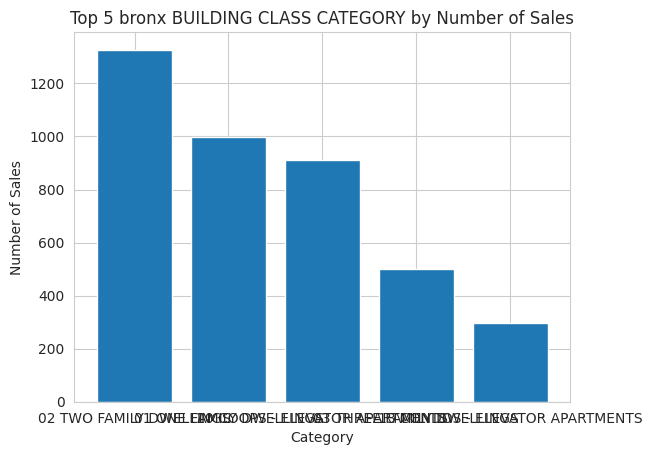

In [ ]:
top5_sales_bronx = top5_type_bronx[('SALE PRICE', 'count')]
top5_bclasscat_bronx = top5_sales_bronx.index

plt.bar(top5_bclasscat_bronx, top5_sales_bronx)
plt.title('Top 5 bronx BUILDING CLASS CATEGORY by Number of Sales')
plt.xlabel('Category')
plt.ylabel('Number of Sales')

plt.show()


In [ ]:
top5_type_bronx1 = df_bronx.groupby(["NEIGHBORHOOD"]).agg({'SALE PRICE': ['count', 'min', 'max', 'mean']})
top5_type_bronx1 = top5_type_bronx1.sort_values(by=('SALE PRICE', 'count'), ascending=False).head(5)
print(top5_type_bronx1)
#------------------------------------------
average_sale_price_bronx = df_bronx['SALE PRICE'].mean()
highest_sale_price_bronx = df_bronx['SALE PRICE'].max()
lowest_sale_price_bronx = df_bronx['SALE PRICE'].min()
# print the highest and lowest sale prices
print('Average sale price: ${:,.2f}'.format(average_sale_price_bronx))
print('Highest sale price: ${:,.2f}'.format(highest_sale_price_bronx))

               SALE PRICE                           
                    count    min      max       mean
NEIGHBORHOOD                                        
RIVERDALE             554  60000  2000000 376124.162
SOUNDVIEW             318  61195  2075000 414535.343
WILLIAMSBRIDGE        310  68000  1500000 442410.719
PARKCHESTER           304  60840  1272812 211080.174
BAYCHESTER            291  67500  1800000 423052.072
Average sale price: $432,180.47
Highest sale price: $2,100,000.00


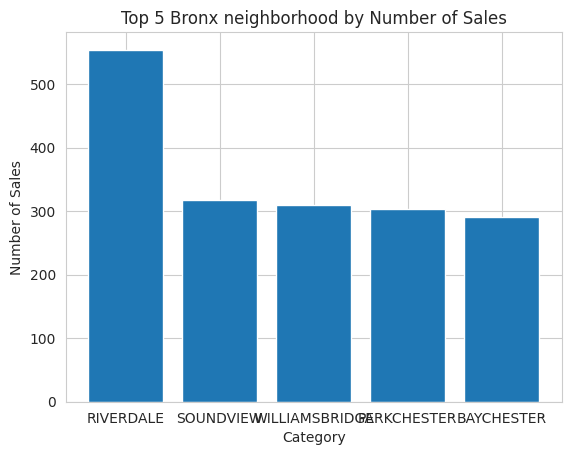

In [ ]:
top5_sales_bronx1 = top5_type_bronx1[('SALE PRICE', 'count')]
top5_neighborhood_bronx1 = top5_sales_bronx1.index

plt.bar(top5_neighborhood_bronx1, top5_sales_bronx1)
plt.title('Top 5 Bronx neighborhood by Number of Sales')
plt.xlabel('Category')
plt.ylabel('Number of Sales')

plt.show()


##Brooklyn Criteria

In [ ]:
df_brooklyn = df_distribution[df_distribution['BOROUGH'] == 'Brooklyn'].copy()
df_brooklyn

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,SALE PRICE,SALE DATE
25355,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,800000,2017-02-27
25358,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1200000,2017-03-31
25359,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1090000,2016-10-24
25361,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1060000,2017-04-21
25362,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,2050000,2017-05-16
...,...,...,...,...,...
49378,Brooklyn,WYCKOFF HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,910000,2017-05-03
49379,Brooklyn,WYCKOFF HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,934000,2017-06-19
49380,Brooklyn,WYCKOFF HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,499998,2017-02-22
49392,Brooklyn,WYCKOFF HEIGHTS,27 FACTORIES,300000,2017-03-28


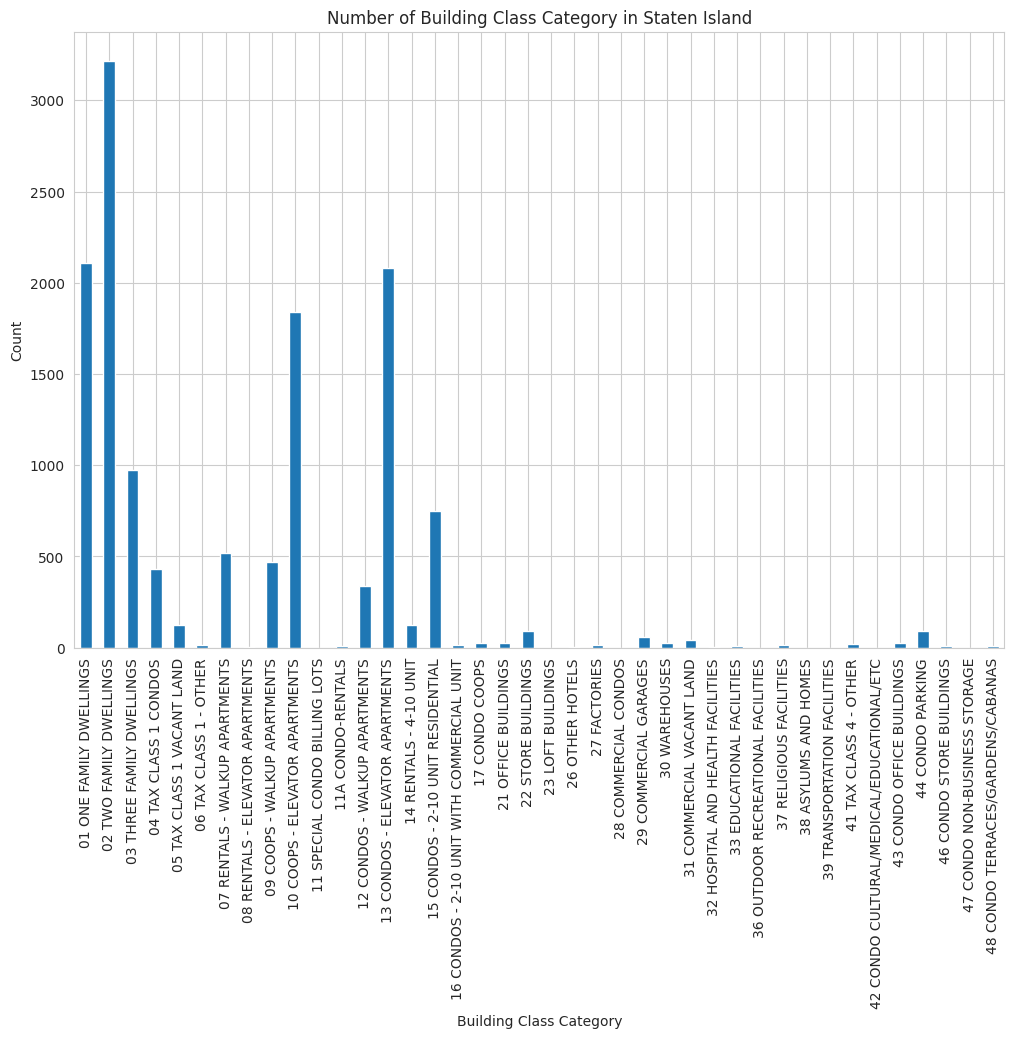

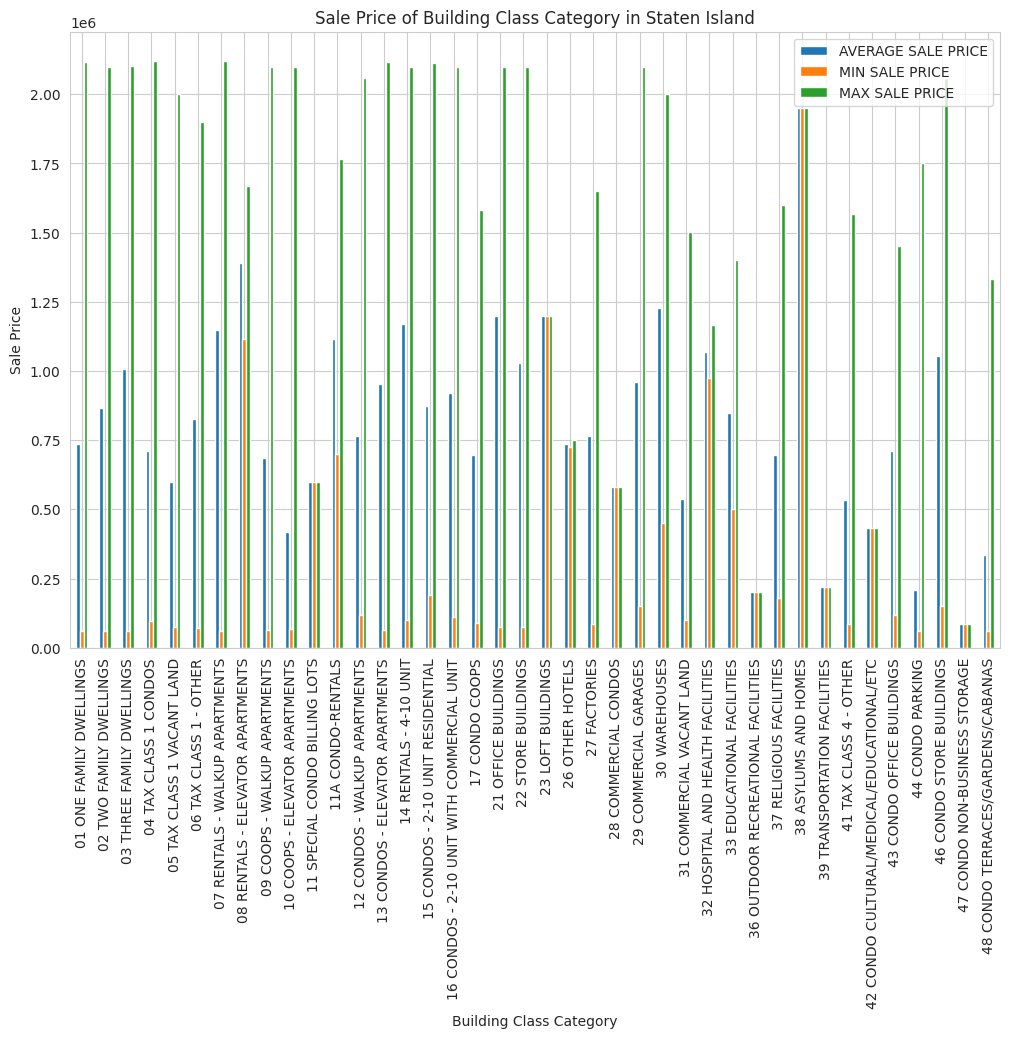

In [ ]:
df_brooklyn_grouped = df_brooklyn.groupby('BUILDING CLASS CATEGORY').agg({'BUILDING CLASS CATEGORY': 'count', 'SALE PRICE': ['mean', 'min', 'max']})
df_brooklyn_grouped.columns = ['COUNT', 'AVERAGE SALE PRICE', 'MIN SALE PRICE', 'MAX SALE PRICE']

ax = df_brooklyn_grouped['COUNT'].plot(kind='bar', figsize=(12,8))
ax.set_title('Number of Building Class Category in Staten Island')
ax.set_xlabel('Building Class Category')
ax.set_ylabel('Count')
plt.show()

ax = df_brooklyn_grouped[['AVERAGE SALE PRICE', 'MIN SALE PRICE', 'MAX SALE PRICE']].plot(kind='bar', figsize=(12,8))
ax.set_title('Sale Price of Building Class Category in Staten Island')
ax.set_xlabel('Building Class Category')
ax.set_ylabel('Sale Price')
plt.show()


In [ ]:
df_brooklyn_grouped

,COUNT,AVERAGE SALE PRICE,MIN SALE PRICE,MAX SALE PRICE
BUILDING CLASS CATEGORY,,,,
01 ONE FAMILY DWELLINGS,2107,737931.926,60000,2115000
02 TWO FAMILY DWELLINGS,3215,866708.894,60000,2100000
03 THREE FAMILY DWELLINGS,975,1005792.687,60000,2100500
04 TAX CLASS 1 CONDOS,430,709604.223,98000,2120000
05 TAX CLASS 1 VACANT LAND,126,597941.889,75000,2000000
06 TAX CLASS 1 - OTHER,14,827071.429,70000,1900000
07 RENTALS - WALKUP APARTMENTS,520,1149011.137,60000,2120000
08 RENTALS - ELEVATOR APARTMENTS,2,1391672.500,1114000,1669345
09 COOPS - WALKUP APARTMENTS,468,684089.756,62500,2100000


In [ ]:
top5_type_brooklyn = df_brooklyn.groupby(["BUILDING CLASS CATEGORY"]).agg({'SALE PRICE': ['count', 'min', 'max', 'mean']})
top5_type_brooklyn = top5_type_brooklyn.sort_values(by=('SALE PRICE', 'count'), ascending=False).head(5)
print(top5_type_brooklyn)

                                SALE PRICE                            
                                     count    min      max        mean
BUILDING CLASS CATEGORY                                               
02 TWO FAMILY DWELLINGS               3215  60000  2100000  866708.894
01 ONE FAMILY DWELLINGS               2107  60000  2115000  737931.926
13 CONDOS - ELEVATOR APARTMENTS       2079  65000  2116279  952078.496
10 COOPS - ELEVATOR APARTMENTS        1838  66687  2100000  417485.196
03 THREE FAMILY DWELLINGS              975  60000  2100500 1005792.687


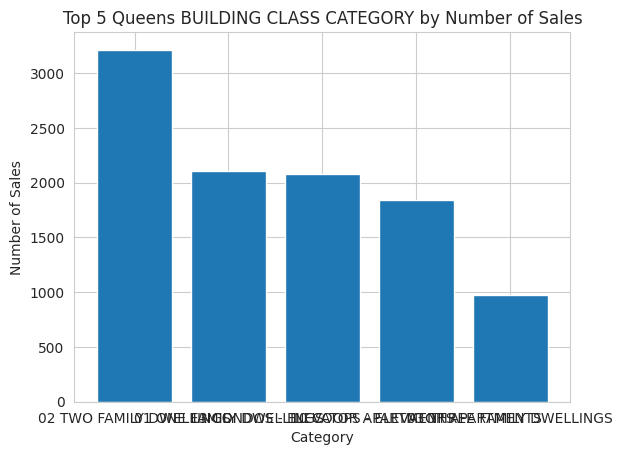

In [ ]:
top5_sales_brooklyn = top5_type_brooklyn[('SALE PRICE', 'count')]
top5_bclasscat_brooklyn = top5_sales_brooklyn.index

plt.bar(top5_bclasscat_brooklyn, top5_sales_brooklyn)
plt.title('Top 5 Queens BUILDING CLASS CATEGORY by Number of Sales')
plt.xlabel('Category')
plt.ylabel('Number of Sales')

plt.show()


In [ ]:
top5_type_brooklyn1 = df_brooklyn.groupby(["NEIGHBORHOOD"]).agg({'SALE PRICE': ['count', 'min', 'max', 'mean']})
top5_type_brooklyn1 = top5_type_brooklyn1.sort_values(by=('SALE PRICE', 'count'), ascending=False).head(5)
print(top5_type_brooklyn1)
#------------------------------------------
average_sale_price_brooklyn = df_brooklyn['SALE PRICE'].mean()
highest_sale_price_brooklyn = df_brooklyn['SALE PRICE'].max()
lowest_sale_price_brooklyn = df_brooklyn['SALE PRICE'].min()
# print the highest and lowest sale prices
print('Average sale price: ${:,.2f}'.format(average_sale_price_brooklyn))
print('Highest sale price: ${:,.2f}'.format(highest_sale_price_brooklyn))

                   SALE PRICE                            
                        count    min      max        mean
NEIGHBORHOOD                                             
BEDFORD STUYVESANT        769  61095  2120000 1014231.521
EAST NEW YORK             637  60000  2000000  501186.571
SHEEPSHEAD BAY            632  65789  2000000  551120.921
BOROUGH PARK              556  85000  2100500  995870.507
BAY RIDGE                 533  60000  2100000  718718.180
Average sale price: $801,904.66
Highest sale price: $2,120,000.00


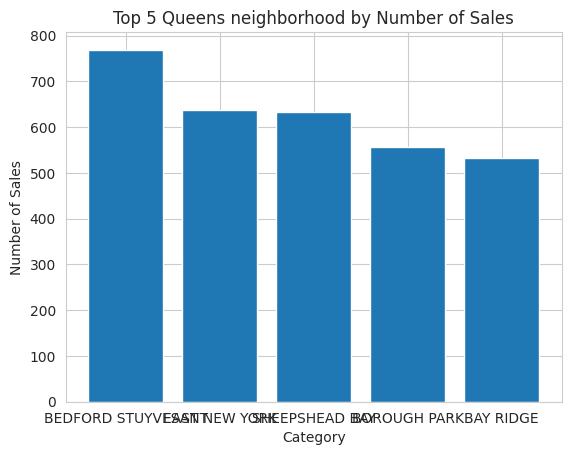

In [ ]:
top5_sales_brooklyn1 = top5_type_brooklyn1[('SALE PRICE', 'count')]
top5_neighborhood_brooklyn1 = top5_sales_brooklyn1.index

plt.bar(top5_neighborhood_brooklyn1, top5_sales_brooklyn1)
plt.title('Top 5 Queens neighborhood by Number of Sales')
plt.xlabel('Category')
plt.ylabel('Number of Sales')

plt.show()


##Queens Criteria

In [ ]:
df_queens = df_distribution[df_distribution['BOROUGH'] == 'Queens'].copy()
df_queens

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,SALE PRICE,SALE DATE
49402,Queens,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,792000,2017-07-26
49404,Queens,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,275500,2016-11-18
49405,Queens,AIRPORT LA GUARDIA,03 THREE FAMILY DWELLINGS,970000,2017-07-31
49406,Queens,AIRPORT LA GUARDIA,07 RENTALS - WALKUP APARTMENTS,1400000,2017-05-16
49408,Queens,AIRPORT LA GUARDIA,12 CONDOS - WALKUP APARTMENTS,425000,2017-01-17
...,...,...,...,...,...
76083,Queens,WOODSIDE,22 STORE BUILDINGS,1500000,2017-01-09
76084,Queens,WOODSIDE,22 STORE BUILDINGS,1600000,2017-03-09
76095,Queens,WOODSIDE,30 WAREHOUSES,1700000,2016-12-16
76100,Queens,WOODSIDE,30 WAREHOUSES,1700000,2016-12-16


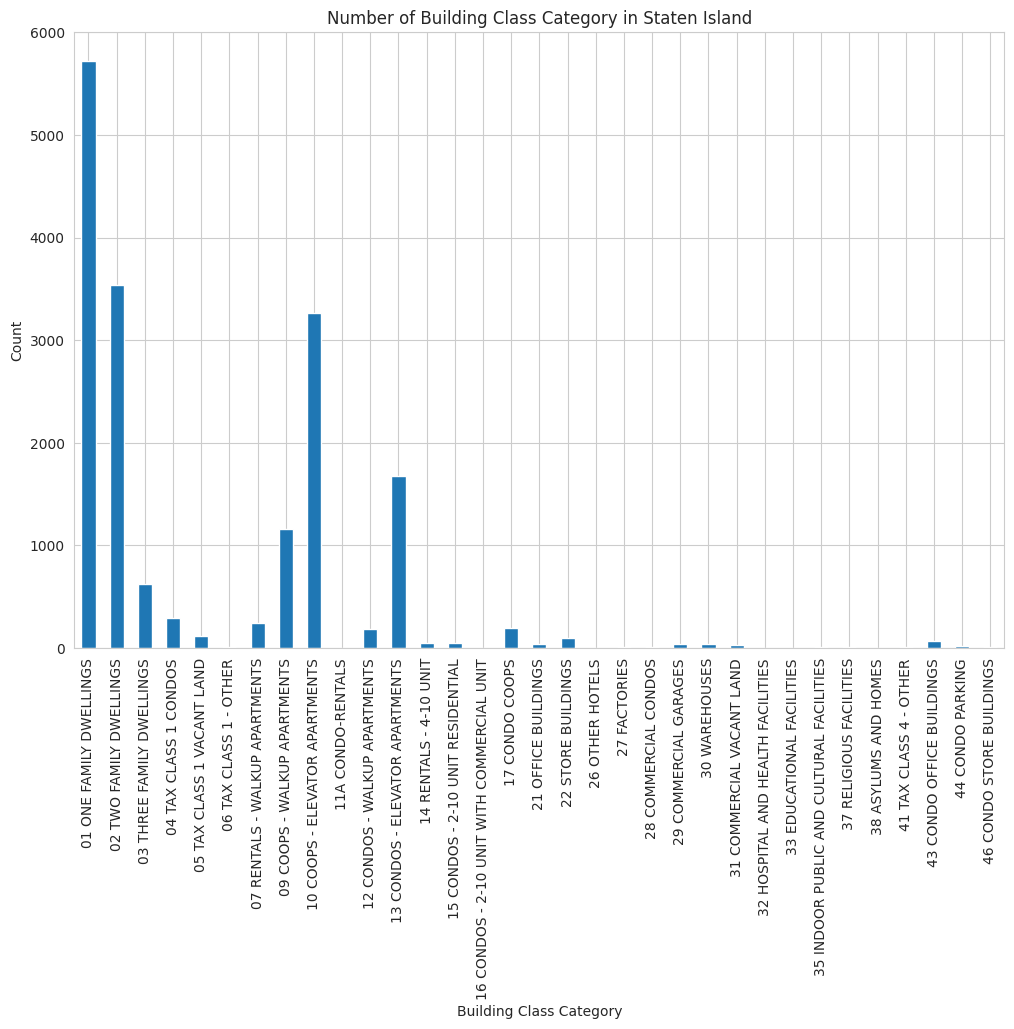

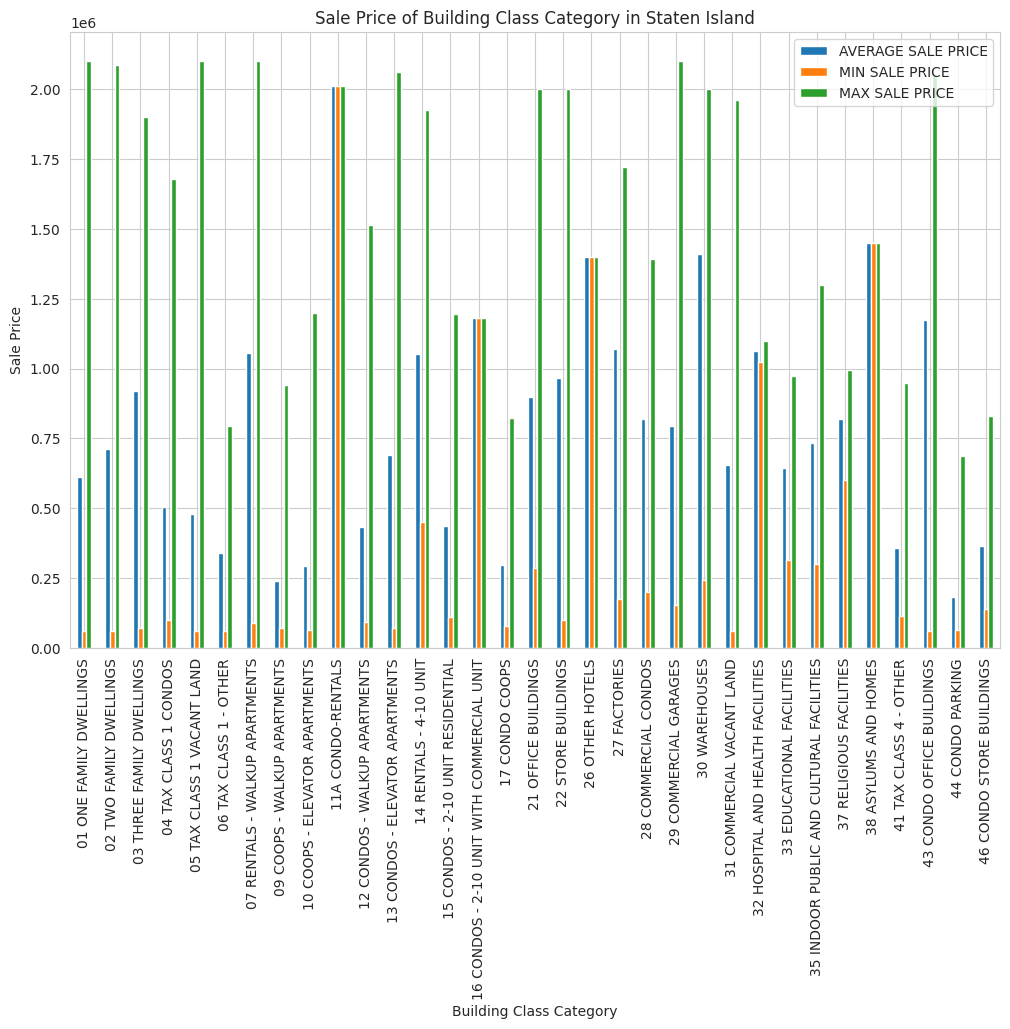

In [ ]:
df_queens_grouped = df_queens.groupby('BUILDING CLASS CATEGORY').agg({'BUILDING CLASS CATEGORY': 'count', 'SALE PRICE': ['mean', 'min', 'max']})
df_queens_grouped.columns = ['COUNT', 'AVERAGE SALE PRICE', 'MIN SALE PRICE', 'MAX SALE PRICE']

ax = df_queens_grouped['COUNT'].plot(kind='bar', figsize=(12,8))
ax.set_title('Number of Building Class Category in Staten Island')
ax.set_xlabel('Building Class Category')
ax.set_ylabel('Count')
plt.show()

ax = df_queens_grouped[['AVERAGE SALE PRICE', 'MIN SALE PRICE', 'MAX SALE PRICE']].plot(kind='bar', figsize=(12,8))
ax.set_title('Sale Price of Building Class Category in Staten Island')
ax.set_xlabel('Building Class Category')
ax.set_ylabel('Sale Price')
plt.show()


In [ ]:
df_queens_grouped

,COUNT,AVERAGE SALE PRICE,MIN SALE PRICE,MAX SALE PRICE
BUILDING CLASS CATEGORY,,,,
01 ONE FAMILY DWELLINGS,5718,610895.454,60000,2100000
02 TWO FAMILY DWELLINGS,3536,712656.490,60000,2087412
03 THREE FAMILY DWELLINGS,624,918192.901,70000,1900000
04 TAX CLASS 1 CONDOS,295,505658.420,100000,1680000
05 TAX CLASS 1 VACANT LAND,112,480538.312,60000,2100000
06 TAX CLASS 1 - OTHER,7,340142.857,60000,795000
07 RENTALS - WALKUP APARTMENTS,244,1054437.742,90000,2100000
09 COOPS - WALKUP APARTMENTS,1157,240196.955,72000,940000
10 COOPS - ELEVATOR APARTMENTS,3269,294431.347,65000,1200000


In [ ]:
top5_type_queens = df_queens.groupby(["BUILDING CLASS CATEGORY"]).agg({'SALE PRICE': ['count', 'min', 'max', 'mean']})
top5_type_queens = top5_type_queens.sort_values(by=('SALE PRICE', 'count'), ascending=False).head(5)
print(top5_type_queens)

                                SALE PRICE                           
                                     count    min      max       mean
BUILDING CLASS CATEGORY                                              
01 ONE FAMILY DWELLINGS               5718  60000  2100000 610895.454
02 TWO FAMILY DWELLINGS               3536  60000  2087412 712656.490
10 COOPS - ELEVATOR APARTMENTS        3269  65000  1200000 294431.347
13 CONDOS - ELEVATOR APARTMENTS       1678  70000  2062805 691561.347
09 COOPS - WALKUP APARTMENTS          1157  72000   940000 240196.955


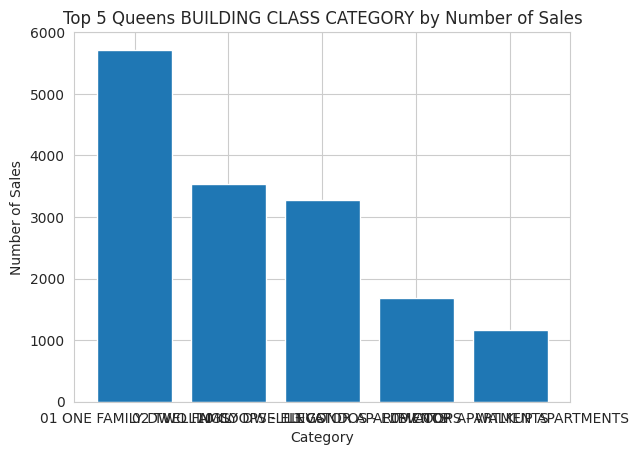

In [ ]:
top5_sales_queens = top5_type_queens[('SALE PRICE', 'count')]
top5_bclasscat_queens = top5_sales_queens.index

plt.bar(top5_bclasscat_queens, top5_sales_queens)
plt.title('Top 5 Queens BUILDING CLASS CATEGORY by Number of Sales')
plt.xlabel('Category')
plt.ylabel('Number of Sales')

plt.show()


In [ ]:
top5_type_queens1 = df_queens.groupby(["NEIGHBORHOOD"]).agg({'SALE PRICE': ['count', 'min', 'max', 'mean']})
top5_type_queens1 = top5_type_queens1.sort_values(by=('SALE PRICE', 'count'), ascending=False).head(5)
print(top5_type_queens1)
#------------------------------------------
average_sale_price_queens = df_queens['SALE PRICE'].mean()
highest_sale_price_queens = df_queens['SALE PRICE'].max()
lowest_sale_price_queens = df_queens['SALE PRICE'].min()
# print the highest and lowest sale prices
print('Average sale price: ${:,.2f}'.format(average_sale_price_queens))
print('Highest sale price: ${:,.2f}'.format(highest_sale_price_queens))

                SALE PRICE                           
                     count    min      max       mean
NEIGHBORHOOD                                         
FLUSHING-NORTH        2041  60000  2100000 741974.190
FOREST HILLS           847  72000  2100000 502593.806
BAYSIDE                823  82000  2088000 644881.673
JACKSON HEIGHTS        704  70000  1650000 494907.331
FLUSHING-SOUTH         643  60000  1883762 517046.560
Average sale price: $572,233.33
Highest sale price: $2,100,000.00


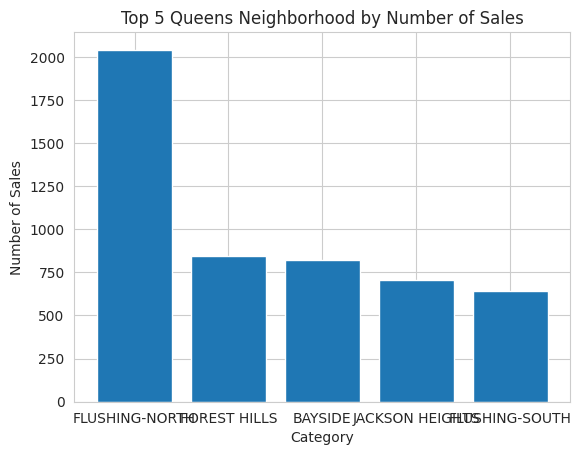

In [ ]:
top5_sales_queens1 = top5_type_queens1[('SALE PRICE', 'count')]
top5_bclasscat_queens1 = top5_sales_queens1.index

plt.bar(top5_bclasscat_queens1, top5_sales_queens1)
plt.title('Top 5 Queens Neighborhood by Number of Sales')
plt.xlabel('Category')
plt.ylabel('Number of Sales')

plt.show()


##Manhattan Criteria

In [ ]:
df_manhattan = df_distribution[df_distribution['BOROUGH'] == 'Manhattan'].copy()
df_manhattan

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,SALE PRICE,SALE DATE
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,499000,2017-03-10
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,529500,2017-06-09
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,423000,2017-07-14
17,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,501000,2017-03-16
18,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,450000,2016-09-01
...,...,...,...,...,...
18295,Manhattan,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,594658,2017-02-16
18296,Manhattan,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,560000,2017-02-22
18297,Manhattan,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,475000,2017-01-05
18298,Manhattan,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,400530,2017-01-26


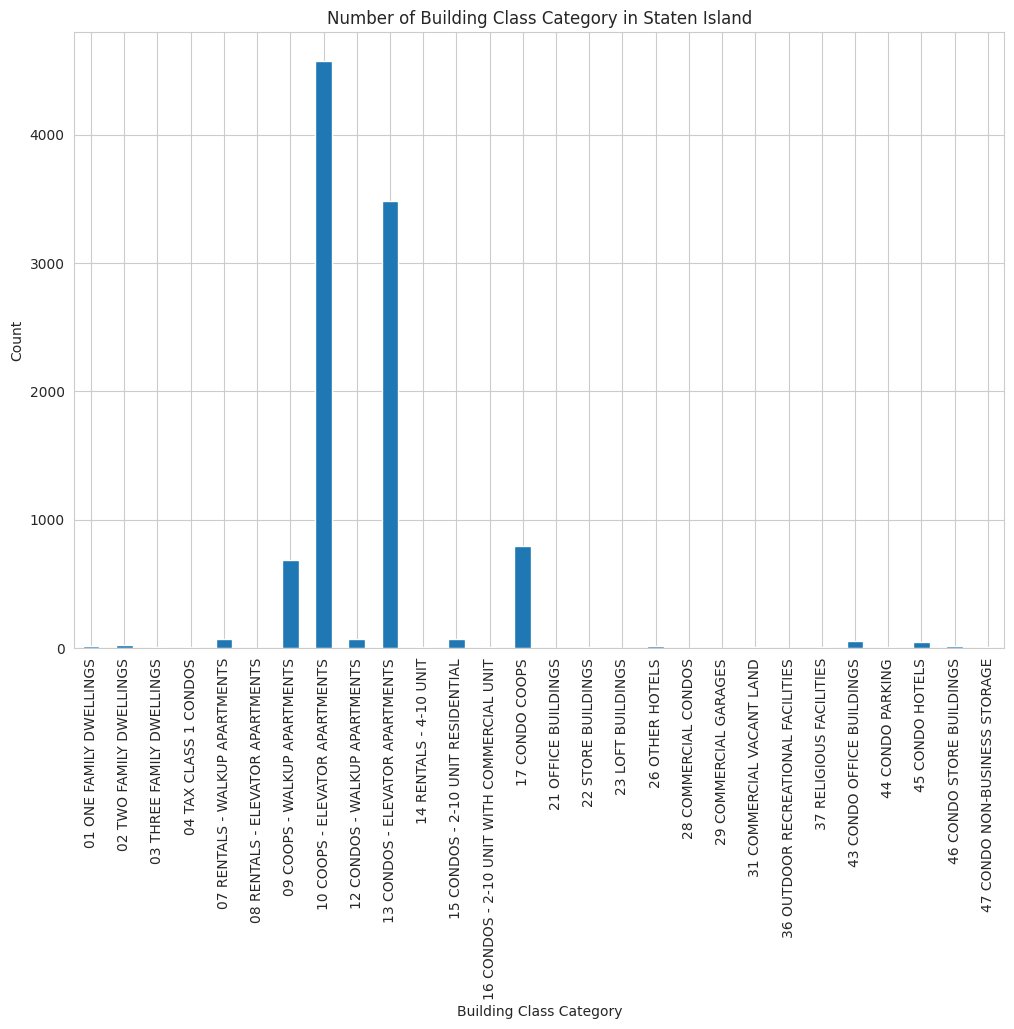

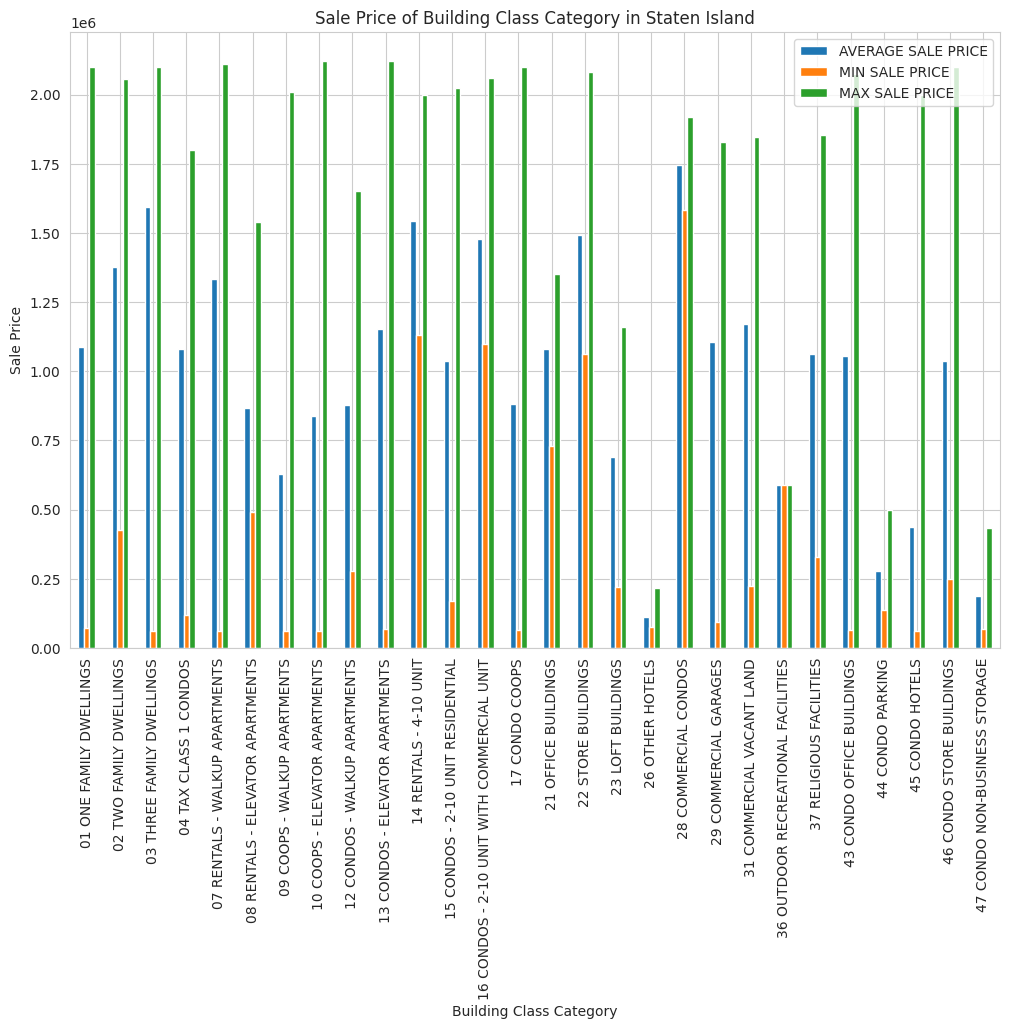

In [ ]:
df_manhattan_grouped = df_manhattan.groupby('BUILDING CLASS CATEGORY').agg({'BUILDING CLASS CATEGORY': 'count', 'SALE PRICE': ['mean', 'min', 'max']})
df_manhattan_grouped.columns = ['COUNT', 'AVERAGE SALE PRICE', 'MIN SALE PRICE', 'MAX SALE PRICE']

ax = df_manhattan_grouped['COUNT'].plot(kind='bar', figsize=(12,8))
ax.set_title('Number of Building Class Category in Staten Island')
ax.set_xlabel('Building Class Category')
ax.set_ylabel('Count')
plt.show()

ax = df_manhattan_grouped[['AVERAGE SALE PRICE', 'MIN SALE PRICE', 'MAX SALE PRICE']].plot(kind='bar', figsize=(12,8))
ax.set_title('Sale Price of Building Class Category in Staten Island')
ax.set_xlabel('Building Class Category')
ax.set_ylabel('Sale Price')
plt.show()


In [ ]:
df_manhattan_grouped

,COUNT,AVERAGE SALE PRICE,MIN SALE PRICE,MAX SALE PRICE
BUILDING CLASS CATEGORY,,,,
01 ONE FAMILY DWELLINGS,12,1089211.000,72500,2100000
02 TWO FAMILY DWELLINGS,21,1375840.810,424797,2056500
03 THREE FAMILY DWELLINGS,11,1594493.182,60000,2100000
04 TAX CLASS 1 CONDOS,5,1079300.000,119000,1800000
07 RENTALS - WALKUP APARTMENTS,68,1332877.838,62500,2110000
08 RENTALS - ELEVATOR APARTMENTS,3,868717.667,489854,1540000
09 COOPS - WALKUP APARTMENTS,686,627198.759,62442,2010000
10 COOPS - ELEVATOR APARTMENTS,4571,838651.646,62868,2120000
12 CONDOS - WALKUP APARTMENTS,68,879527.279,277105,1650000


In [ ]:
top5_type_manhattan = df_manhattan.groupby(["BUILDING CLASS CATEGORY"]).agg({'SALE PRICE': ['count', 'min', 'max', 'mean']})
top5_type_manhattan = top5_type_manhattan.sort_values(by=('SALE PRICE', 'count'), ascending=False).head(5)
print(top5_type_manhattan)

                                  SALE PRICE                             
                                       count     min      max        mean
BUILDING CLASS CATEGORY                                                  
10 COOPS - ELEVATOR APARTMENTS          4571   62868  2120000  838651.646
13 CONDOS - ELEVATOR APARTMENTS         3484   70256  2120000 1154455.156
17 CONDO COOPS                           797   65000  2100000  880436.384
09 COOPS - WALKUP APARTMENTS             686   62442  2010000  627198.759
15 CONDOS - 2-10 UNIT RESIDENTIAL         71  169228  2025000 1038781.127


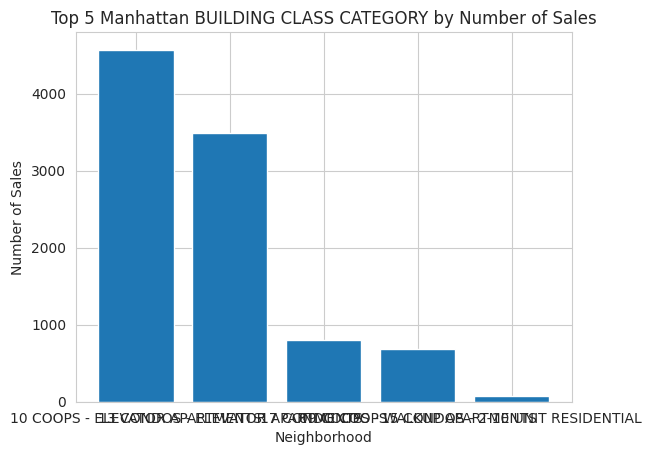

In [ ]:
# Create a bar chart of the top 5 Manhattan neighborhoods by number of sales
top5_sales_manhattan = top5_type_manhattan[('SALE PRICE', 'count')]
top5_bclasscat_manhattan = top5_sales_manhattan.index

plt.bar(top5_bclasscat_manhattan, top5_sales_manhattan)
plt.title('Top 5 Manhattan BUILDING CLASS CATEGORY by Number of Sales')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Sales')

plt.show()


In [ ]:
top5_type_manhattan1 = df_manhattan.groupby(["NEIGHBORHOOD"]).agg({'SALE PRICE': ['count', 'min', 'max', 'mean']})
top5_type_manhattan1 = top5_type_manhattan1.sort_values(by=('SALE PRICE', 'count'), ascending=False).head(5)
print(top5_type_manhattan1)
#------------------------------------------
average_sale_price_manhattan = df_manhattan['SALE PRICE'].mean()
highest_sale_price_manhattan = df_manhattan['SALE PRICE'].max()
lowest_sale_price_manhattan = df_manhattan['SALE PRICE'].min()
# print the highest and lowest sale prices
print('Average sale price: ${:,.2f}'.format(average_sale_price_manhattan))
print('Highest sale price: ${:,.2f}'.format(highest_sale_price_manhattan))

                        SALE PRICE                            
                             count     min      max       mean
NEIGHBORHOOD                                                  
UPPER EAST SIDE (59-79)       1048   70000  2120000 918556.892
UPPER EAST SIDE (79-96)        924   62442  2110000 961090.646
MIDTOWN EAST                   821  100000  2119162 839237.892
UPPER WEST SIDE (59-79)        750   62868  2120000 970646.996
HARLEM-CENTRAL                 535   60000  2100000 852969.548
Average sale price: $944,613.75
Highest sale price: $2,120,000.00


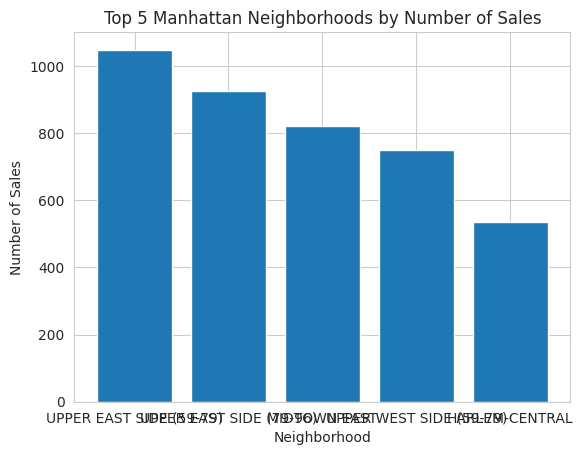

In [ ]:
# Create a bar chart of the top 5 Manhattan neighborhoods by number of sales
top5_sales_manhattan1 = top5_type_manhattan1[('SALE PRICE', 'count')]
top5_neighborhoods_manhattan = top5_sales_manhattan1.index

plt.bar(top5_neighborhoods_manhattan, top5_sales_manhattan1)
plt.title('Top 5 Manhattan Neighborhoods by Number of Sales')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Sales')

plt.show()


## Borough Characteristics

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51319 entries, 13 to 84547
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    51319 non-null  object        
 1   NEIGHBORHOOD               51319 non-null  object        
 2   BUILDING CLASS CATEGORY    51319 non-null  object        
 3   BLOCK                      51319 non-null  int64         
 4   LOT                        51319 non-null  int64         
 5   ADDRESS                    51319 non-null  object        
 6   RESIDENTIAL UNITS          51319 non-null  int64         
 7   COMMERCIAL UNITS           51319 non-null  int64         
 8   TOTAL UNITS                51319 non-null  int64         
 9   LAND SQUARE FEET           51319 non-null  int64         
 10  GROSS SQUARE FEET          51319 non-null  int64         
 11  YEAR BUILT                 51319 non-null  int64         
 12  TAX

In [ ]:
price_borough = df_eda.groupby('BOROUGH')['SALE PRICE'].agg(['min', 'max', 'mean'])
price_borough

,min,max,mean
BOROUGH,,,
Bronx,60000,2100000,432180.472
Brooklyn,60000,2120000,801904.663
Manhattan,60000,2120000,944613.745
Queens,60000,2100000,572233.326
Staten Island,60000,1960000,493328.709


In [ ]:
top5_type = df_eda.groupby(["BUILDING CLASS CATEGORY", "BOROUGH"]).agg({'SALE PRICE': ['count', 'min', 'max', 'mean']}).groupby(level="BOROUGH").apply(lambda x: x.sort_values(by=('SALE PRICE', 'count'), ascending=False).head(5))
top5_type

SALE PRICE  \
                                                                   count   
BOROUGH       BUILDING CLASS CATEGORY           BOROUGH                    
Bronx         02 TWO FAMILY DWELLINGS           Bronx               1327   
              01 ONE FAMILY DWELLINGS           Bronx                998   
              10 COOPS - ELEVATOR APARTMENTS    Bronx                910   
              03 THREE FAMILY DWELLINGS         Bronx                500   
              13 CONDOS - ELEVATOR APARTMENTS   Bronx                297   
Brooklyn      02 TWO FAMILY DWELLINGS           Brooklyn            3215   
              01 ONE FAMILY DWELLINGS           Brooklyn            2107   
              13 CONDOS - ELEVATOR APARTMENTS   Brooklyn            2079   
              10 COOPS - ELEVATOR APARTMENTS    Brooklyn            1838   
              03 THREE FAMILY DWELLINGS         Brooklyn             975   
Manhattan     10 COOPS - ELEVATOR APARTMENTS    Manhattan           4571   
              13 CONDOS - ELEVATOR APARTMENTS   Manhattan           3484   
              17 CONDO COOPS                    Manhattan            797   
              09 COOPS - WALKUP APARTMENTS      Manhattan            686   
              15 CONDOS - 2-10 UNIT RESIDENTIAL Manhattan             71   
Queens        01 ONE FAMILY DWELLINGS           Queens              5718   
              02 TWO FAMILY DWELLINGS           Queens              3536   
              10 COOPS - ELEVATOR APARTMENTS    Queens              3269   
              13 CONDOS - ELEVATOR APARTMENTS   Queens              1678   
              09 COOPS - WALKUP APARTMENTS      Queens              1157   
Staten Island 01 ONE FAMILY DWELLINGS           Staten Island       3496   
              02 TWO FAMILY DWELLINGS           Staten Island       1297   
              04 TAX CLASS 1 CONDOS             Staten Island        393   
              13 CONDOS - ELEVATOR APARTMENTS   Staten Island        126   
              05 TAX CLASS 1 VACANT LAND        Staten Island        109   

                                                                       \
                                                                  min   
BOROUGH       BUILDING CLASS CATEGORY           BOROUGH                 
Bronx         02 TWO FAMILY DWELLINGS           Bronx           80000   
              01 ONE FAMILY DWELLINGS           Bronx           68571   
              10 COOPS - ELEVATOR APARTMENTS    Bronx           60000   
              03 THREE FAMILY DWELLINGS         Bronx          100000   
              13 CONDOS - ELEVATOR APARTMENTS   Bronx           65000   
Brooklyn      02 TWO FAMILY DWELLINGS           Brooklyn        60000   
              01 ONE FAMILY DWELLINGS           Brooklyn        60000   
              13 CONDOS - ELEVATOR APARTMENTS   Brooklyn        65000   
              10 COOPS - ELEVATOR APARTMENTS    Brooklyn        66687   
              03 THREE FAMILY DWELLINGS         Brooklyn        60000   
Manhattan     10 COOPS - ELEVATOR APARTMENTS    Manhattan       62868   
              13 CONDOS - ELEVATOR APARTMENTS   Manhattan       70256   
              17 CONDO COOPS                    Manhattan       65000   
              09 COOPS - WALKUP APARTMENTS      Manhattan       62442   
              15 CONDOS - 2-10 UNIT RESIDENTIAL Manhattan      169228   
Queens        01 ONE FAMILY DWELLINGS           Queens          60000   
              02 TWO FAMILY DWELLINGS           Queens          60000   
              10 COOPS - ELEVATOR APARTMENTS    Queens          65000   
              13 CONDOS - ELEVATOR APARTMENTS   Queens          70000   
              09 COOPS - WALKUP APARTMENTS      Queens          72000   
Staten Island 01 ONE FAMILY DWELLINGS           Staten Island   62000   
              02 TWO FAMILY DWELLINGS           Staten Island   75000   
              04 TAX CLASS 1 CONDOS             Staten Island   72500   
              13 CONDOS - ELEVATOR 

In [ ]:
df_eda

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,"327 EAST 3 STREET, 1C",0,0,0,-1,-1,1920,2,499000,2017-03-10
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,"327 EAST 3RD STREET, 5A",0,0,0,-1,-1,1920,2,529500,2017-06-09
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,"327 EAST 3 STREET, 2E",0,0,0,-1,-1,1920,2,423000,2017-07-14
17,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,46,"317 EAST 3RD STREET, 12",0,0,0,-1,-1,1925,2,501000,2017-03-16
18,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,49,"311 EAST 3RD STREET, 17",0,0,0,-1,-1,1920,2,450000,2016-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,7317,126,112 ROBIN COURT,2,0,2,11088,2160,1994,1,648000,2016-12-07
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,7349,34,37 QUAIL LANE,2,0,2,2400,2575,1998,1,450000,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,7349,78,32 PHEASANT LANE,2,0,2,2498,2377,1998,1,550000,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,7351,60,49 PITNEY AVENUE,2,0,2,4000,1496,1925,1,460000,2017-07-05


#5)Extract to CSV

In [ ]:
from google.colab import files
#import pandas as pd

# Save the dataframe to a CSV file
df_eda.to_csv('groupE.csv', index=False)

# Download the CSV file
files.download('groupE.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>